In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import DBSCAN, KMeans
import math
import json

In [2]:
#self maid utilies functions to handle files

#function that merge 2 csv files into 1 file and return as dataframe object
def load_merge_save_df(file_name1,file_name2,new_file):
    df1 = load_csv(file_name1)
    df2 = load_csv(file_name2)
    df3 = df1.append(df2)
    df3.drop_duplicates(inplace=True)
    save_to_csv(df3,new_file)
    return df3

#function that merge dataframe object with csv file and return dataframe object
def load_merge_df(df1,file_name2):
    print(type(df1))
    df2 = load_csv(file_name2)
    df3 = df1.append(df2)
    return df3.drop_duplicates()

#function that combine a list of csv files into 1 file
def load_merge_save_list_csv(file_names,new_file):
    df1 = load_csv(file_names[0])
    for file in file_names:
        df1 = load_merge_df(df1,file)
    save_to_csv(df1,new_file)
    
# function that saves dictionary object into json file   

def save_to_json(data, file_name):
    with open(file_name, "w", encoding='utf-8') as file:
        json.dump(data, file)
# function that save dataframe object into csv file

def save_to_csv(df,file_name):
    df.to_csv(file_name)

# function that load csv file and return as dataframe object
def load_csv(file_name):
    return pd.read_csv(file_name,index_col=0)

# function that merge dicitionary into 1 dictionary
def merge_dicts(dict1,dict2):
    dict3 = {**dict1,**dict2}
    return dict3


In [110]:
#loading the data
df = load_csv('all_users.csv')

In [111]:
df

Unnamed: 0.1                            favourite 1  \
0                        LorenzoBF                                    NaN   
1                       notwestman                                    NaN   
2                            ETC19                      Shiva Baby (2020)   
3                         jelenaam                                    NaN   
4                        TransyTex                                    NaN   
...                            ...                                    ...   
Lucy                           NaN                    Interstellar (2014)   
Nic Craig                      NaN                                    NaN   
Valerii Ege Deshevykh          NaN                        Watchmen (2009)   
Bard                           NaN  The Metamorphosis of Mr. Samsa (1977)   
mesnetullah                    NaN                 The Dark Knight (2008)   

                                                            favourite 2  \
0                                                                   NaN   
1                                                                   NaN   
2                      The Meyerowitz Stories (New and Selected) (2017)   
3                                                                   NaN   
4                                                                   NaN   
...                                                                 ...   
Lucy                             Star Trek II: The Wrath of Khan (1982)   
Nic Craig                                                           NaN   
Valerii Ege Deshevykh                              Opening Night (1977)   
Bard                                                     Rabbits (2002)   
mesnetullah                                        The Lion King (1994)   

                                            favourite 3  \
0                                                   NaN   
1                                                   NaN   
2                                        Cabaret (1972)   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
Lucy                   A Charlie Brown Christmas (1965)   
Nic Craig                                           NaN   
Valerii Ege Deshevykh                War Machine (2017)   
Bard                              Sound of Metal (2019)   
mesnetullah                         Barry Lyndon (1975)   

                                     favourite 4  Action  Adventure  \
0                                            NaN      31         31   
1                                            NaN       4          4   
2                      tick, tick...BOOM! (2021)      21         19   
3                                            NaN       0          1   
4                                            NaN      25         32   
...                                          ...     ...        ...   
Lucy                    Together Together (2021)       4         15   
Nic Craig                                    NaN       4         16   
Valerii Ege Deshevykh      Reservoir Dogs (1992)     324        209   
Bard                               Titane (2021)      53         53   
mesnetullah             Castle in the Sky (1986)       3          1   

                       Animation  Comedy  Crime  ...  last     mid  \
0                             10      58     45  ...  2021  2007.0   
1                              3       7      5  ...  2021  2018.0   
2                              3      41     18  ...  2021  2011.5   
3                              3      10      0  ...  2021  2014.5   
4                              8      54     52  ...  2021  1998.0   
...                          ...     ...    ...  ...   ...     ...   
Lucy                           5       9      1  ...  2021  2014.0   
Nic Craig                      0       1      0  ...  2021  2011.0   
Vale

In [112]:
df.drop(['Israel','Unnamed: 0.1','mean','mid','Brazil','Portuguese',"Hebrew (modern)"],axis=1,inplace=True)

In [184]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4476 entries, 0 to mesnetullah
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   favourite 1        2612 non-null   object 
 1   favourite 2        2547 non-null   object 
 2   favourite 3        2492 non-null   object 
 3   favourite 4        2381 non-null   object 
 4   Action             4476 non-null   int64  
 5   Adventure          4476 non-null   int64  
 6   Animation          4476 non-null   int64  
 7   Comedy             4476 non-null   int64  
 8   Crime              4476 non-null   int64  
 9   Documentary        4476 non-null   int64  
 10  Drama              4476 non-null   int64  
 11  Family             4476 non-null   int64  
 12  Fantasy            4476 non-null   int64  
 13  History            4476 non-null   int64  
 14  Horror             4476 non-null   int64  
 15  Music              4476 non-null   int64  
 16  Mystery            447

data types:
* 5 categorical
* 48 discrete


removing null values from rating columns

In [114]:
df["★★★★★"].replace(to_replace=np.NaN,value=0,inplace=True)
df["★★★★½"].replace(to_replace=np.NaN,value=0,inplace=True)
df["★★★★"].replace(to_replace=np.NaN,value=0,inplace=True)
df["★★★½"].replace(to_replace=np.NaN,value=0,inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4476 entries, 0 to mesnetullah
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   favourite 1        2612 non-null   object 
 1   favourite 2        2547 non-null   object 
 2   favourite 3        2492 non-null   object 
 3   favourite 4        2381 non-null   object 
 4   Action             4476 non-null   int64  
 5   Adventure          4476 non-null   int64  
 6   Animation          4476 non-null   int64  
 7   Comedy             4476 non-null   int64  
 8   Crime              4476 non-null   int64  
 9   Documentary        4476 non-null   int64  
 10  Drama              4476 non-null   int64  
 11  Family             4476 non-null   int64  
 12  Fantasy            4476 non-null   int64  
 13  History            4476 non-null   int64  
 14  Horror             4476 non-null   int64  
 15  Music              4476 non-null   int64  
 16  Mystery            447

In [116]:
#fixing the index column of the dataframe
df_cop = df.copy()
df_cop = df_cop.reset_index()
df_cop = df_cop.drop(["index"],axis=1)
df_cop

favourite 1  \
0                                       NaN   
1                                       NaN   
2                         Shiva Baby (2020)   
3                                       NaN   
4                                       NaN   
...                                     ...   
4471                    Interstellar (2014)   
4472                                    NaN   
4473                        Watchmen (2009)   
4474  The Metamorphosis of Mr. Samsa (1977)   
4475                 The Dark Knight (2008)   

                                           favourite 2  \
0                                                  NaN   
1                                                  NaN   
2     The Meyerowitz Stories (New and Selected) (2017)   
3                                                  NaN   
4                                                  NaN   
...                                                ...   
4471            Star Trek II: The Wrath of Khan (1982)   
4472                                               NaN   
4473                              Opening Night (1977)   
4474                                    Rabbits (2002)   
4475                              The Lion King (1994)   

                           favourite 3                favourite 4  Action  \
0                                  NaN                        NaN      31   
1                                  NaN                        NaN       4   
2                       Cabaret (1972)  tick, tick...BOOM! (2021)      21   
3                                  NaN                        NaN       0   
4                                  NaN                        NaN      25   
...                                ...                        ...     ...   
4471  A Charlie Brown Christmas (1965)   Together Together (2021)       4   
4472                               NaN                        NaN       4   
4473                War Machine (2017)      Reservoir Dogs (1992)     324   
4474             Sound of Metal (2019)              Titane (2021)      53   
4475               Barry Lyndon (1975)   Castle in the Sky (1986)       3   

      Adventure  Animation  Comedy  Crime  Documentary  ...  Germany  first  \
0            31         10      58     45           38  ...       17   1948   
1             4          3       7      5            0  ...        1   2008   
2            19          3      41     18            2  ...        1   1948   
3             1          3      10      0            1  ...        1   2001   
4            32          8      54     52            1  ...        7   1949   
...         ...        ...     ...    ...          ...  ...      ...    ...   
4471         15          5       9      1            0  ...        0   1968   
4472         16          0       1      0            0  ...        2   1990   
4473        209         56     291    193           57  ...       92   1948   
4474         53         27      54     26            2  ...        5   1960   
4475          1          5       0      1            0  ...        0   1986   

      last  ★★★★★  ★★★★½   ★★★★   ★★★½  movies watched  high rated movies  \
0     2021  185.0    7.0   35.0   11.0             276                236   
1     2021   21.0    0.0    0.0    0.0              67                 21   
2     2021   19.0   42.0   35.0   22.0             155                116   
3     2021   11.0    1.0    0.0    0.0              15                 12   
4     2021   84.0   15.0   94.0   31.0             556                224   
...    ...    ...    ...    ...    ...             ...                ...   
4471  2021    9.0    5.0    2.0    6.0              28                 22   
4472  2021    3.0    4.0    8.0    7.0              23                 22   
4473  2021   89.0  184.0  520.0  547.0            2818               1304   
4474  2021   35.0   44.0   76.0   46.0             327                201   
4475  2021    1.0    0.0    4.0    4.0           

In [117]:
#extracting only the numeric features
df_numeric = df_cop.select_dtypes(include='number')

In [118]:
#changing the feature type from int -> float
df_numeric = df_numeric.astype("float")
df_numeric

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       31.0       31.0       10.0    58.0   45.0         38.0  131.0     5.0   
1        4.0        4.0        3.0     7.0    5.0          0.0   14.0     3.0   
2       21.0       19.0        3.0    41.0   18.0          2.0   83.0     2.0   
3        0.0        1.0        3.0    10.0    0.0          1.0    2.0     6.0   
4       25.0       32.0        8.0    54.0   52.0          1.0  141.0    14.0   
...      ...        ...        ...     ...    ...          ...    ...     ...   
4471     4.0       15.0        5.0     9.0    1.0          0.0    7.0     7.0   
4472     4.0       16.0        0.0     1.0    0.0          0.0    7.0     2.0   
4473   324.0      209.0       56.0   291.0  193.0         57.0  535.0    63.0   
4474    53.0       53.0       27.0    54.0   26.0          2.0  100.0    27.0   
4475     3.0        1.0        5.0     0.0    1.0          0.0    7.0     1.0   

      Fantasy  History  ...  Italy  Germany   first    last  ★★★★★  ★★★★½  \
0        18.0      8.0  ...   28.0     17.0  1948.0  2021.0  185.0    7.0   
1         2.0      4.0  ...    0.0      1.0  2008.0  2021.0   21.0    0.0   
2         9.0      1.0  ...    2.0      1.0  1948.0  2021.0   19.0   42.0   
3         5.0      0.0  ...    0.0      1.0  2001.0  2021.0   11.0    1.0   
4        22.0     12.0  ...    3.0      7.0  1949.0  2021.0   84.0   15.0   
...       ...      ...  ...    ...      ...     ...     ...    ...    ...   
4471      2.0      0.0  ...    0.0      0.0  1968.0  2021.0    9.0    5.0   
4472     10.0      2.0  ...    0.0      2.0  1990.0  2021.0    3.0    4.0   
4473    149.0     57.0  ...   23.0     92.0  1948.0  2021.0   89.0  184.0   
4474     28.0      5.0  ...    1.0      5.0  1960.0  2021.0   35.0   44.0   
4475      2.0      0.0  ...    0.0      0.0  1986.0  2021.0    1.0    0.0   

       ★★★★   ★★★½  movies watched  high rated movies  
0      35.0   11.0           276.0              236.0  
1       0.0    0.0            67.0               21.0  
2      35.0   22.0           155.0              116.0  
3       0.0    0.0            15.0               12.0  
4      94.0   31.0           556.0              224.0  
...     ...    ...             ...                ...  
4471    2.0    6.0            28.0               22.0  
4472    8.0    7.0            23.0               22.0  
4473  520.0  547.0          2818.0             1304.0  
4474   76.0   46.0           327.0              201.0  
4475    4.0    4.0            17.0                9.0  

[4476 rows x 43 columns]

In [119]:
df_numeric.isna().sum()

Action               0
Adventure            0
Animation            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
History              0
Horror               0
Music                0
Mystery              0
Romance              0
Science-Fiction      0
Thriller             0
Tv-Movie             0
War                  0
Western              0
English              0
Spanish              0
Japanese             0
Italian              0
German               0
Russian              0
Arabic               0
USA                  0
Canada               0
Australia            0
UK                   0
France               0
Japan                0
Spain                0
Italy                0
Germany              0
first                0
last                 0
★★★★★                0
★★★★½                0
★★★★                 0
★★★½                 0
movies watched       0
high rated movies    0
dtype: int6

In [ ]:
list of features by group:
* Genre_names = all the genres in the website
* langs = all languages we decide to extract

In [120]:
Genres_names = ["Action", "Adventure", "Animation", "Comedy", "Crime",
                "Documentary", "Drama", "Family", "Fantasy", "History",
                "Horror", "Music", "Mystery", "Romance", "Science-Fiction",
                "Thriller", "Tv-Movie", "War", "Western"]
langs = ["English", "Spanish", "Japanese", "Italian", "German", "Russian", "Arabic"]
countries = ["USA", "Canada", "Australia", "UK", "France", "Japan", "Spain", "Italy", "Germany"]

In [193]:
#function to plot corraltion matrix
def plot_corr(df,size,file_name):
    """Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    """


    corr = df.corr()
    #mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(size, size))
    sbn.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,linewidth=5,annot=True)
    plt.savefig(file_name+".pdf")

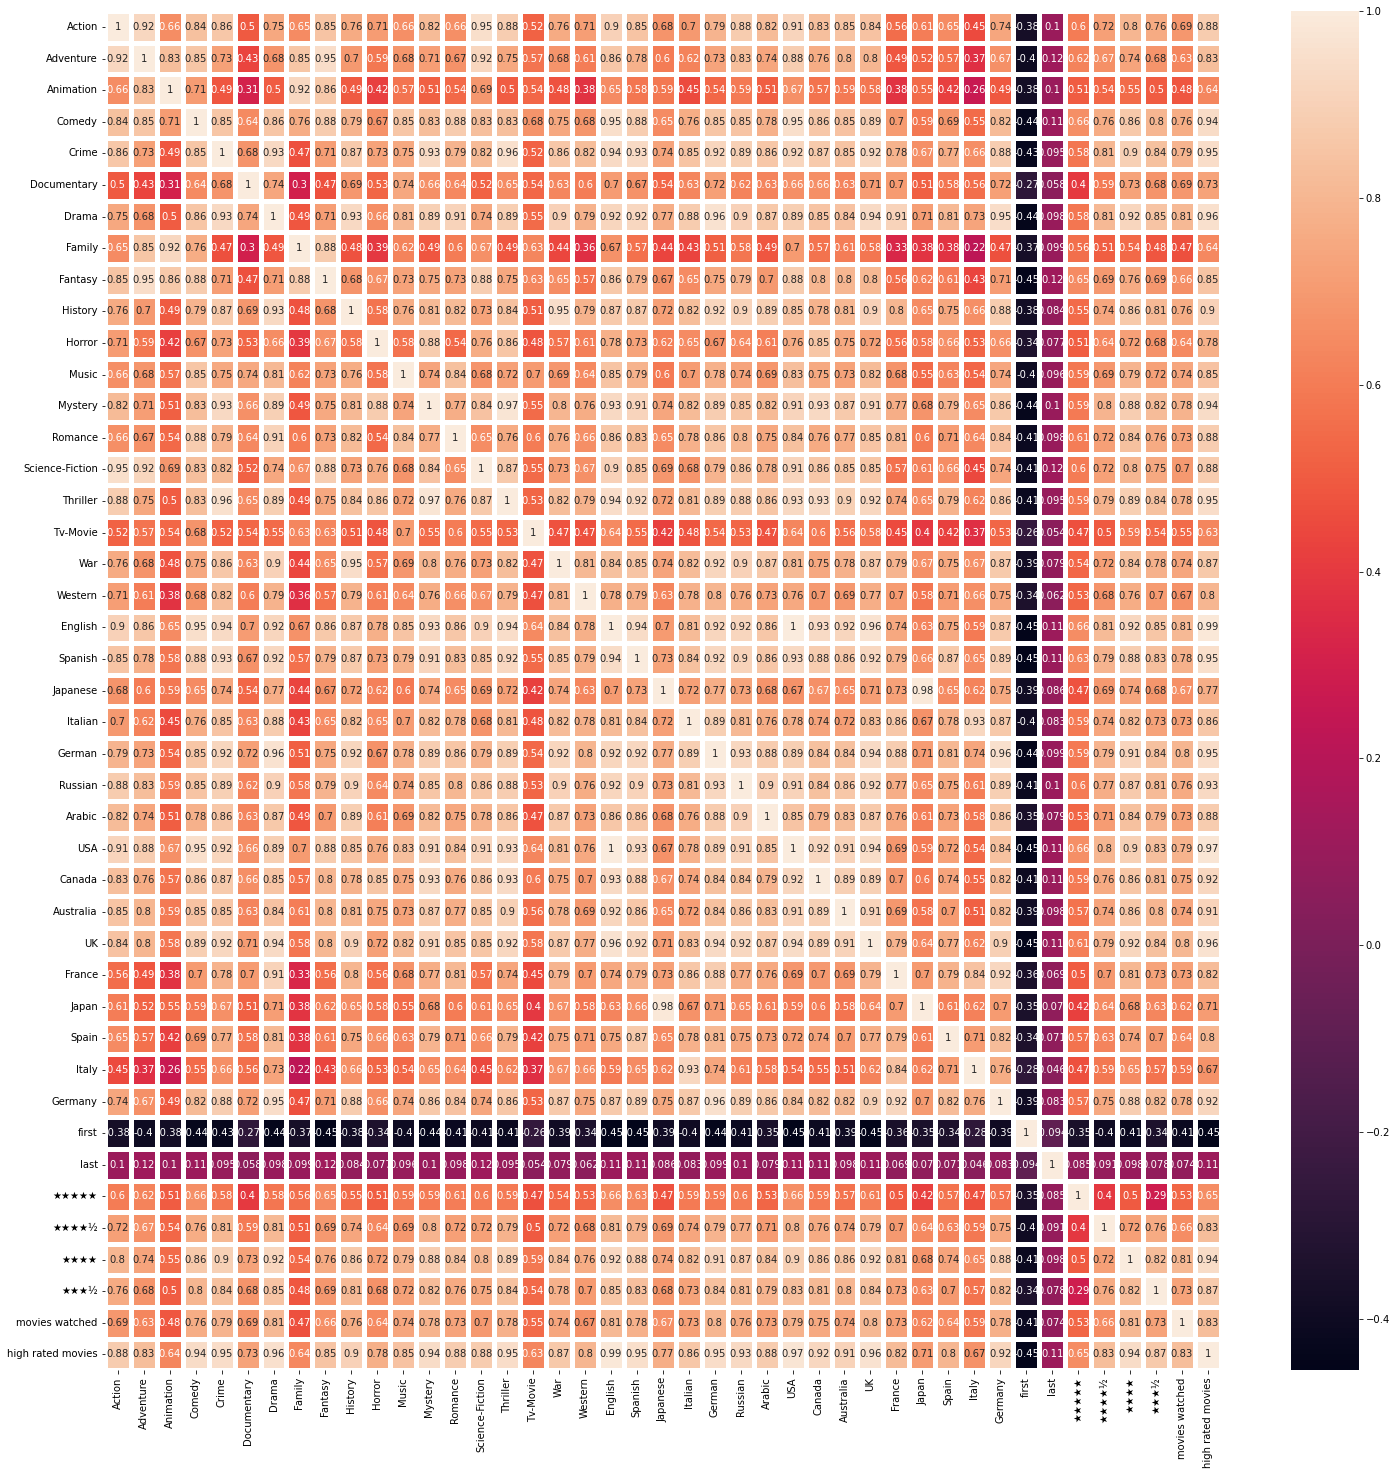

In [194]:
plot_corr(df_numeric,25,'df_numeric')

In [195]:
#function to determine pairwise correltion between features and removig the first that come up
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [198]:
#getting the corralted features
columns_corralted =correlation(df_numeric,0.85)
print(f'the corralated feautures are:{columns_corralted}')

the corralated feautures are:{'German', 'Comedy', 'Germany', 'English', 'Mystery', 'War', 'Japan', 'Music', 'USA', '★★★½', '★★★★', 'Crime', 'Fantasy', 'Russian', 'Romance', 'Science-Fiction', 'Italian', 'France', 'Family', 'Drama', 'Spanish', 'Thriller', 'Italy', 'Adventure', 'Canada', 'UK', 'Arabic', 'Spain', 'Australia', 'History', 'high rated movies'}


In [16]:
as we can see the data is highly corralated. <br/>
we will normalize the feautre groups with relation to its user

In [203]:
(pd.DataFrame(df_numeric.skew()))

0
Action              4.058497
Adventure           2.972737
Animation           3.881186
Comedy              3.936706
Crime               4.579936
Documentary         9.037257
Drama               5.715396
Family              3.603403
Fantasy             2.813652
History             6.220660
Horror              5.660539
Music               4.715507
Mystery             4.079712
Romance             5.153118
Science-Fiction     3.396813
Thriller            4.532377
Tv-Movie            6.816916
War                 6.597410
Western             7.703417
English             4.263219
Spanish             4.489885
Japanese            5.554708
Italian             8.107548
German              5.314229
Russian             4.835879
Arabic              5.787155
USA                 3.959252
Canada              4.322059
Australia           4.638110
UK                  4.441401
France              7.599505
Japan               6.191924
Spain               8.344943
Italy              13.516363
Germany             6.445652
first               0.839140
last              -13.054159
★★★★★               6.828701
★★★★½               4.362318
★★★★                5.834489
★★★½                8.454689
movies watched      4.643113
high rated movies   4.614217

In [ ]:
gettting the columns groups length


In [17]:
genre_len = len(Genres_names)
langs_len = len(langs)
country_len = len(countries)

{'Adventure',
 'Arabic',
 'Australia',
 'Canada',
 'Comedy',
 'Crime',
 'Drama',
 'English',
 'Family',
 'Fantasy',
 'France',
 'German',
 'Germany',
 'History',
 'Italian',
 'Italy',
 'Japan',
 'Music',
 'Mystery',
 'Romance',
 'Russian',
 'Science-Fiction',
 'Spain',
 'Spanish',
 'Thriller',
 'UK',
 'USA',
 'War',
 'high rated movies',
 '★★★½',
 '★★★★'}

In [125]:

#splitting the df into df batches by feature groups
df_genre= df_numeric.iloc[:,:genre_len]
df_langs = df_numeric.iloc[:,genre_len:genre_len+langs_len]
df_countries = df_numeric.iloc[:,genre_len+langs_len:genre_len+langs_len+country_len]
df_ratings = df_numeric.loc[:,'★★★★★':'★★★½']


#function that normalize each group of features with relation to its user
def normalize(df_t,col_list):
    df_copy = df_t.copy()
    col_sum = df_copy.sum(axis=1)
    for i in range(df_copy.shape[0]):
        for col in col_list:
            x = df_copy.at[i,col]/col_sum[i]
            df_copy.at[i,col] = x
    return df_copy

In [126]:
#normalizing the each feature group
df_genre_norm = normalize(df_genre,Genres_names)
df_langs_norm = normalize(df_langs,langs)
df_countries_norm = normalize(df_countries,countries)
df_rating_norm = normalize(df_ratings,['★★★★★','★★★★½','★★★★','★★★½'])

In [127]:
#combining all the feature groups dataframes into 1 df
df_norm = pd.concat([df_genre_norm,df_langs_norm,df_countries_norm,df_rating_norm],axis=1)
df_norm

/var/folders/2y/cvfvtv_90nq5ygd1xyp1d0h00000gn/T/ipykernel_93087/2364952097.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = df_copy.at[i,col]/col_sum[i]


In [128]:
df_norm.isna().sum()

Action  Adventure  Animation    Comedy     Crime  Documentary  \
0     0.058271   0.058271   0.018797  0.109023  0.084586     0.071429   
1     0.064516   0.064516   0.048387  0.112903  0.080645     0.000000   
2     0.074468   0.067376   0.010638  0.145390  0.063830     0.007092   
3     0.000000   0.027778   0.083333  0.277778  0.000000     0.027778   
4     0.045788   0.058608   0.014652  0.098901  0.095238     0.001832   
...        ...        ...        ...       ...       ...          ...   
4471  0.058824   0.220588   0.073529  0.132353  0.014706     0.000000   
4472  0.070175   0.280702   0.000000  0.017544  0.000000     0.000000   
4473  0.099143   0.063953   0.017136  0.089045  0.059058     0.017442   
4474  0.088040   0.088040   0.044850  0.089701  0.043189     0.003322   
4475  0.100000   0.033333   0.166667  0.000000  0.033333     0.000000   

         Drama    Family   Fantasy   History  ...        UK    France  \
0     0.246241  0.009398  0.033835  0.015038  ...  0.160121  0.102719   
1     0.225806  0.048387  0.032258  0.064516  ...  0.137931  0.034483   
2     0.294326  0.007092  0.031915  0.003546  ...  0.105263  0.030075   
3     0.055556  0.166667  0.138889  0.000000  ...  0.117647  0.058824   
4     0.258242  0.025641  0.040293  0.021978  ...  0.180272  0.030612   
...        ...       ...       ...       ...  ...       ...       ...   
4471  0.102941  0.102941  0.029412  0.000000  ...  0.137931  0.000000   
4472  0.122807  0.035088  0.175439  0.035088  ...  0.314286  0.028571   
4473  0.163709  0.019278  0.045594  0.017442  ...  0.137695  0.061059   
4474  0.166113  0.044850  0.046512  0.008306  ...  0.129771  0.041985   
4475  0.233333  0.033333  0.066667  0.000000  ...  0.100000  0.000000   

         Japan     Spain     Italy   Germany     ★★★★★     ★★★★½      ★★★★  \
0     0.012085  0.021148  0.084592  0.051360  0.777311  0.029412  0.147059   
1     0.000000  0.000000  0.000000  0.034483  1.000000  0.000000  0.000000   
2     0.007519  0.007519  0.015038  0.007519  0.161017  0.355932  0.296610   
3     0.000000  0.000000  0.000000  0.058824  0.916667  0.083333  0.000000   
4     0.013605  0.017007  0.010204  0.023810  0.375000  0.066964  0.419643   
...        ...       ...       ...       ...       ...       ...       ...   
4471  0.000000  0.000000  0.000000  0.000000  0.409091  0.227273  0.090909   
4472  0.000000  0.000000  0.000000  0.057143  0.136364  0.181818  0.363636   
4473  0.018069  0.018069  0.014330  0.057321  0.066418  0.137313  0.388060   
4474  0.022901  0.022901  0.003817  0.019084  0.174129  0.218905  0.378109   
4475  0.500000  0.000000  0.000000  0.000000  0.111111  0.000000  0.444444   

          ★★★½  
0     0.046218  
1     0.000000  
2     0.186441  
3     0.000000  
4     0.138393  
...        ...  
4471  0.272727  
4472  0.318182  
4473  0.408209  
4474  0.228856  
4475  0.444444  

[4476 rows x 39 columns]

In [129]:
we will check the corraltion again:

Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science-Fiction    0
Thriller           0
Tv-Movie           0
War                0
Western            0
English            1
Spanish            1
Japanese           1
Italian            1
German             1
Russian            1
Arabic             1
USA                0
Canada             0
Australia          0
UK                 0
France             0
Japan              0
Spain              0
Italy              0
Germany            0
★★★★★              0
★★★★½              0
★★★★               0
★★★½               0
dtype: int64

In [ ]:
plot_corr(df_norm,24)

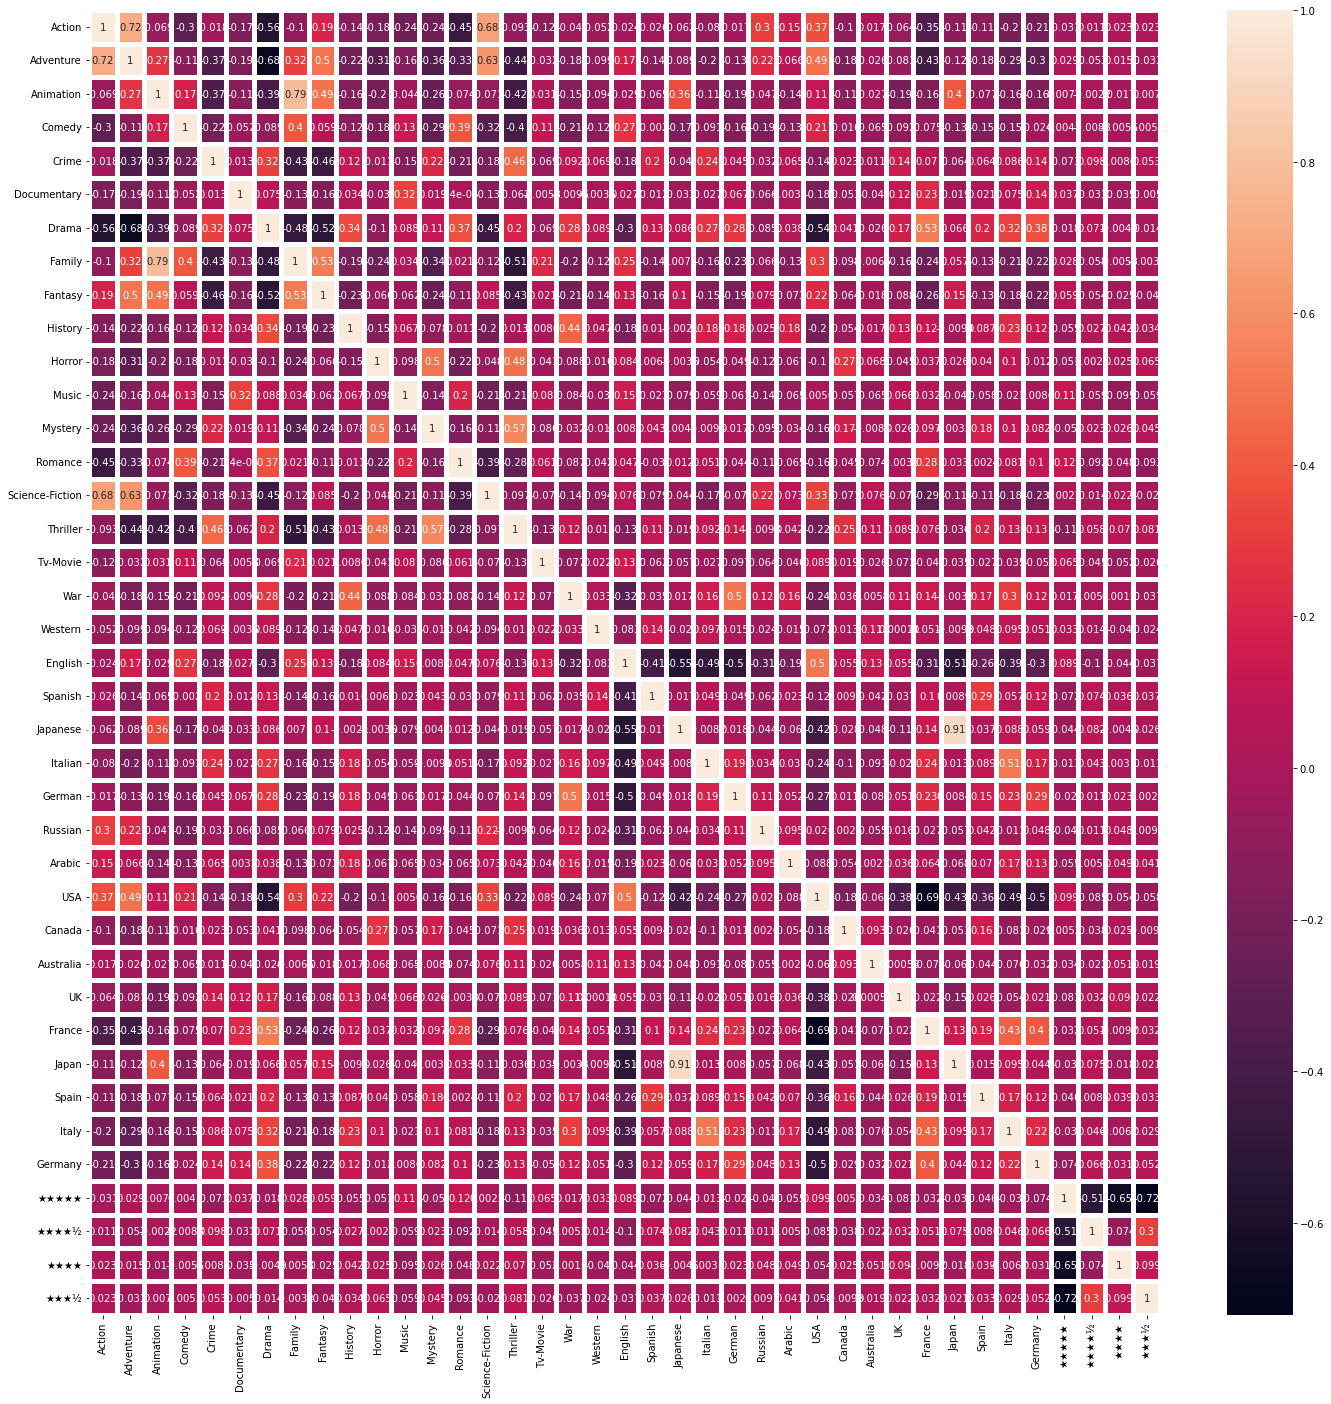

In [214]:
columns_corralted = correlation(df_norm,0.85)
print(f'the corralated feautures are:{columns_corralted}')

the corralated feautures are:{'Japan'}


In [ ]:
as we can see now there is only 1 feautre that is highly corralted and need to be removed <br/>
the feature is the country Japan that is highly corraled to the languge japnases, which makes sense =)

In [131]:
df_numeric.drop(columns_corralted,inplace=True)

{'Japan'}

In [ ]:
def plot_feature_distribution(df):
    df_copy = df.copy()
    colors = ["forestgreen","orange"]
    fig, ax = plt.subplots(10,4,figsize= (20,55))
    fig.suptitle("Feature Distribution",y=0.90,fontsize=50)
    for a,i in enumerate(df_copy.columns):
        ax[math.floor(a/4),a%4].hist(df_copy[i],color=colors[(a+math.floor(a/4))%2],bins=50)
        ax[math.floor(a/4),a%4].title.set_text(i)


In [143]:
plot_feature_distribution(df_norm)

Action              1.307670
Adventure           1.128945
Animation           1.910413
Comedy              0.733485
Crime               2.552668
Documentary        15.800782
Drama               0.391152
Family              1.524348
Fantasy             1.287406
History             5.979871
Horror              2.725417
Music               9.928584
Mystery             4.144014
Romance             2.012377
Science-Fiction     1.906836
Thriller            1.269930
Tv-Movie           12.805014
War                 8.313758
Western            28.698474
English            -0.478867
Spanish             1.446316
Japanese            3.417026
Italian             2.956761
German              3.905614
Russian             3.892221
Arabic              7.310613
USA                -0.582251
Canada              3.376593
Australia           5.292823
UK                  2.337513
France              3.527072
Japan               4.381337
Spain               6.962564
Italy               9.793352
Germany       

In [49]:
Values of skew: <br/>
-0.5 : 0.5 - symmetric<br/>
we can that only few feasters are in that ranges

In [215]:
df_norm.skew()

Action              1.307670
Adventure           1.128945
Animation           1.910413
Comedy              0.733485
Crime               2.552668
Documentary        15.800782
Drama               0.391152
Family              1.524348
Fantasy             1.287406
History             5.979871
Horror              2.725417
Music               9.928584
Mystery             4.144014
Romance             2.012377
Science-Fiction     1.906836
Thriller            1.269930
Tv-Movie           12.805014
War                 8.313758
Western            28.698474
English            -0.478867
Spanish             1.446316
Japanese            3.417026
Italian             2.956761
German              3.905614
Russian             3.892221
Arabic              7.310613
USA                -0.582251
Canada              3.376593
Australia           5.292823
UK                  2.337513
France              3.527072
Japan               4.381337
Spain               6.962564
Italy               9.793352
Germany       

In [144]:
we can see that the distribution of most of the features is not normal <br/>
this can affect our model by the outliers of the features <br/>
we will try to fix it with some transformation of the features into normal distribution

In [212]:
from sklearn.preprocessing import power_transform

In [146]:
df_norm_transformed  = power_transform(df_norm)
df_norm_transformed  = pd.DataFrame(df_norm_transformed)
df_norm_transformed = df_norm_transformed.set_axis(df_norm.columns,axis=1)
df_norm_transformed.skew()

0     0.021525
1     0.023008
2     0.160085
3    -0.032584
4    -0.032522
5     0.745571
6     0.002087
7     0.164632
8    -0.017927
9     0.187336
10    0.213535
11    0.238151
12   -0.010140
13    0.076382
14   -0.017144
15   -0.032464
16    0.897195
17    0.279145
18    0.573873
19    0.097863
20   -0.101050
21    0.203845
22   -0.034403
23   -0.105540
24   -0.001382
25    0.333556
26    0.075080
27   -0.030676
28    0.173154
29   -0.121392
30    0.216978
31    0.485166
32    0.363924
33    0.604171
34    0.026274
35    0.080854
36    0.079783
37    0.018344
38    0.073151
dtype: float64

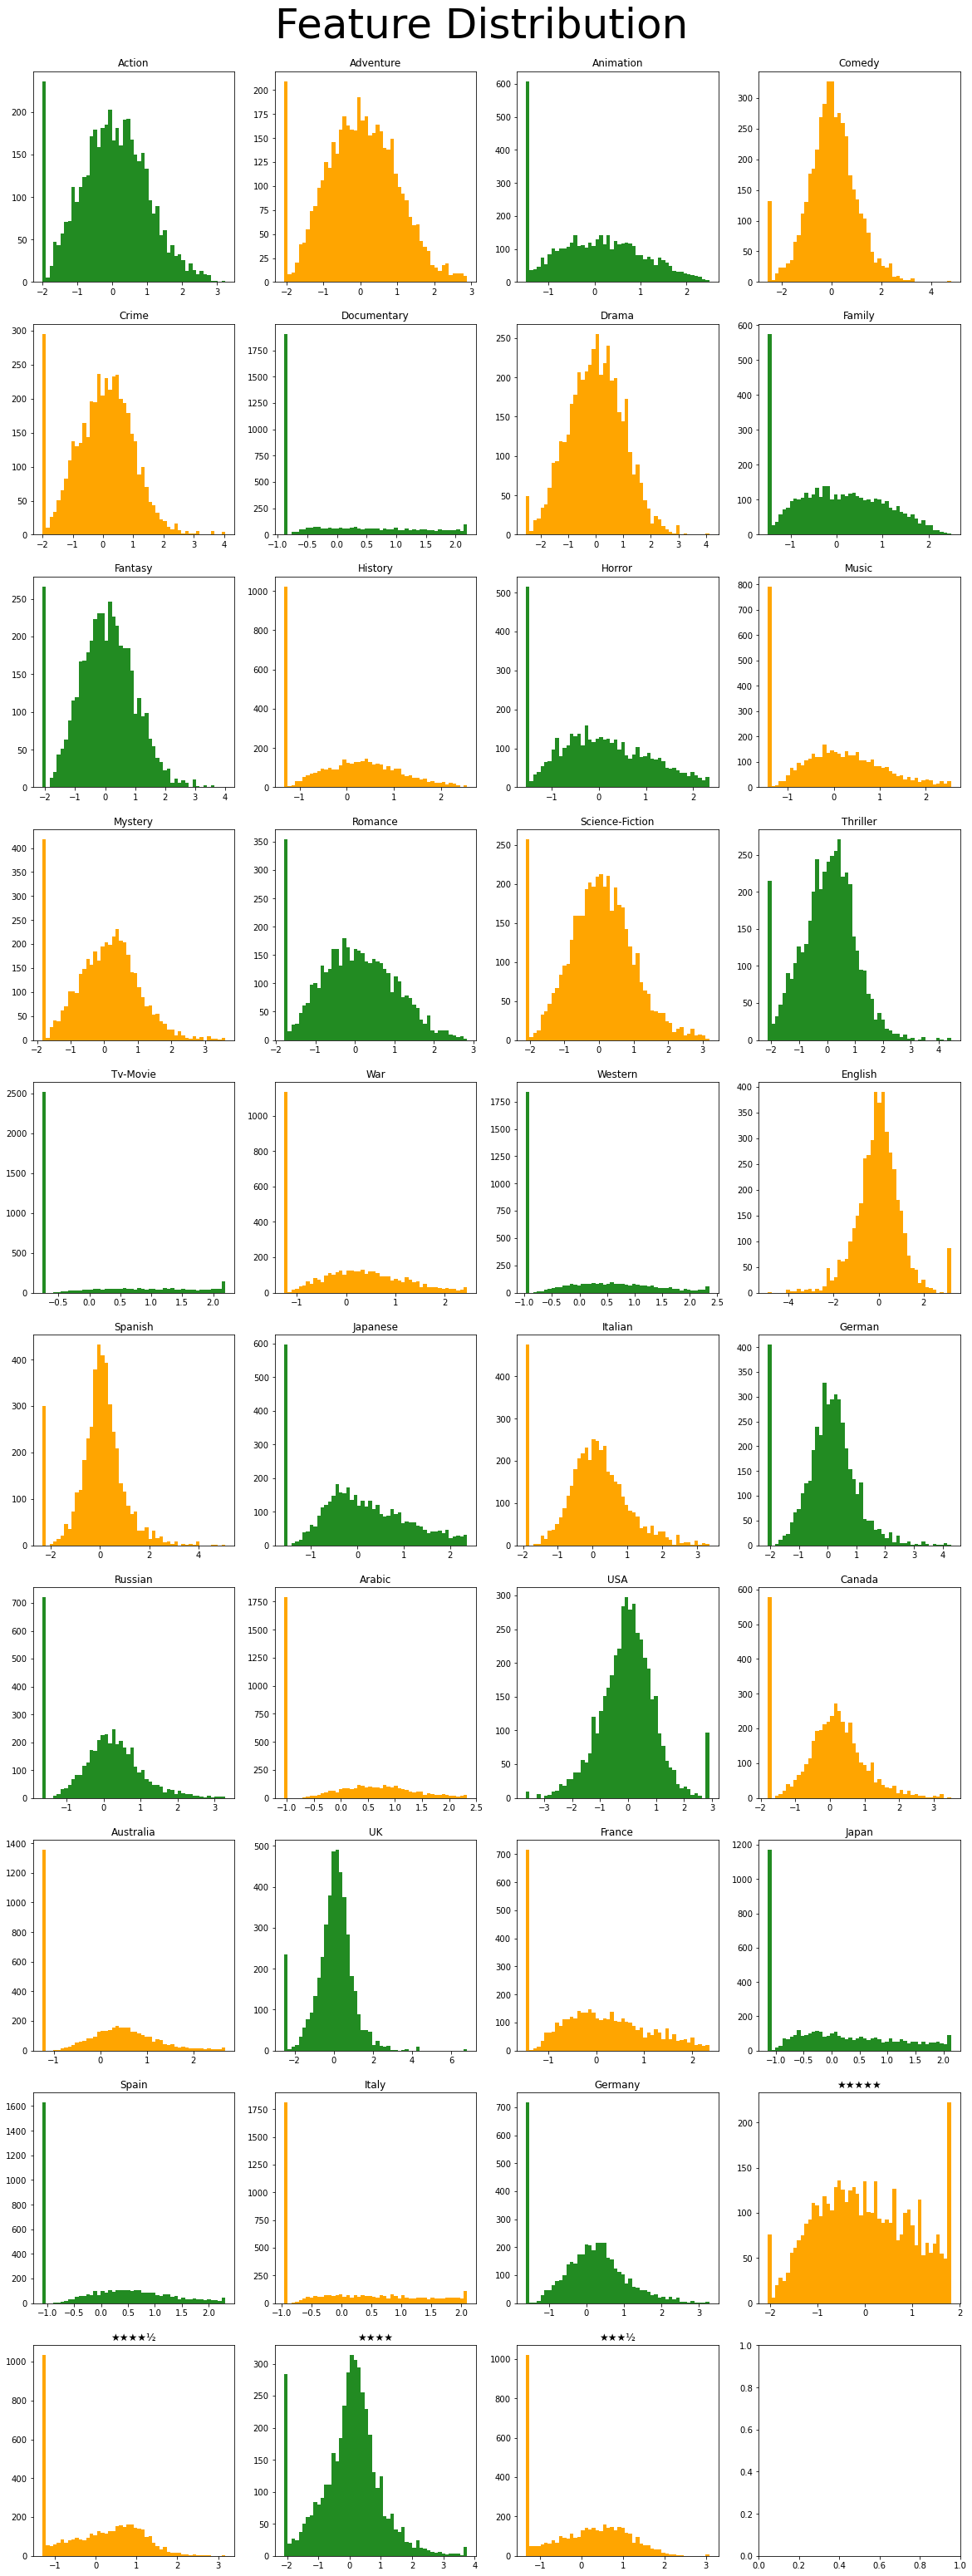

In [216]:
plot_feature_distribution(df_norm_transformed)
# plt.savefig("feature_dist_tranformed.svg")
# plt.savefig("feature_dist_tranformed.pdf")

In [ ]:
df_norm_transformed.skew()

In [ ]:
def plot_outliers(df):
    df_copy = df.copy()
    fig, ax = plt.subplots(figsize= (20,30))

    ax = sbn.boxplot(data = df_copy,orient='h')


In [221]:
def outlier_detection_iqr(df):
    df_copy= df.copy()
    num_cols= df_copy.columns

    for col in num_cols:
        Q1= np.percentile(df[col],25)
        Q3= np.percentile(df[col],75)
        IQR= Q3 - Q1
        df_copy[col][(df_copy[col] < Q1 - 1.5*IQR) | (df_copy[col] > Q3 + 1.5*IQR)] = df[col].mean()
    return df_copy

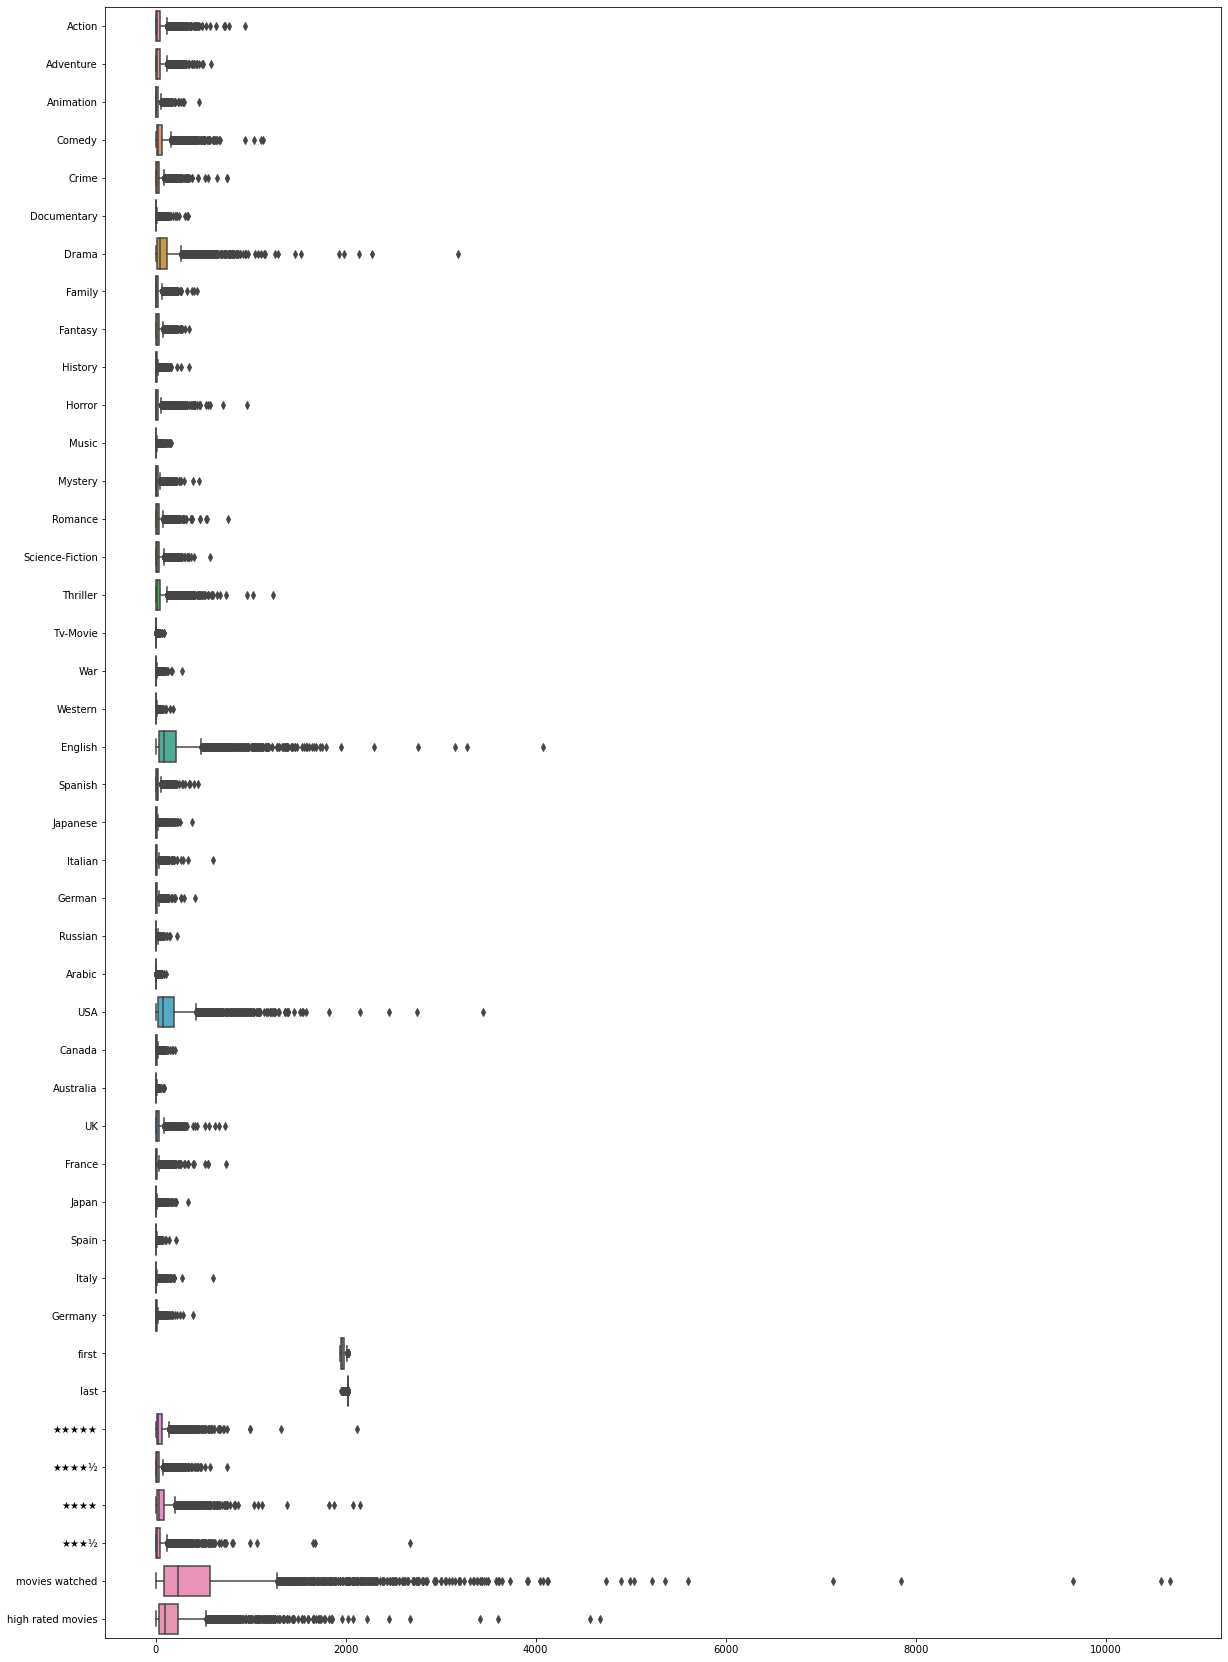

In [219]:
plot_outliers(df_numeric)

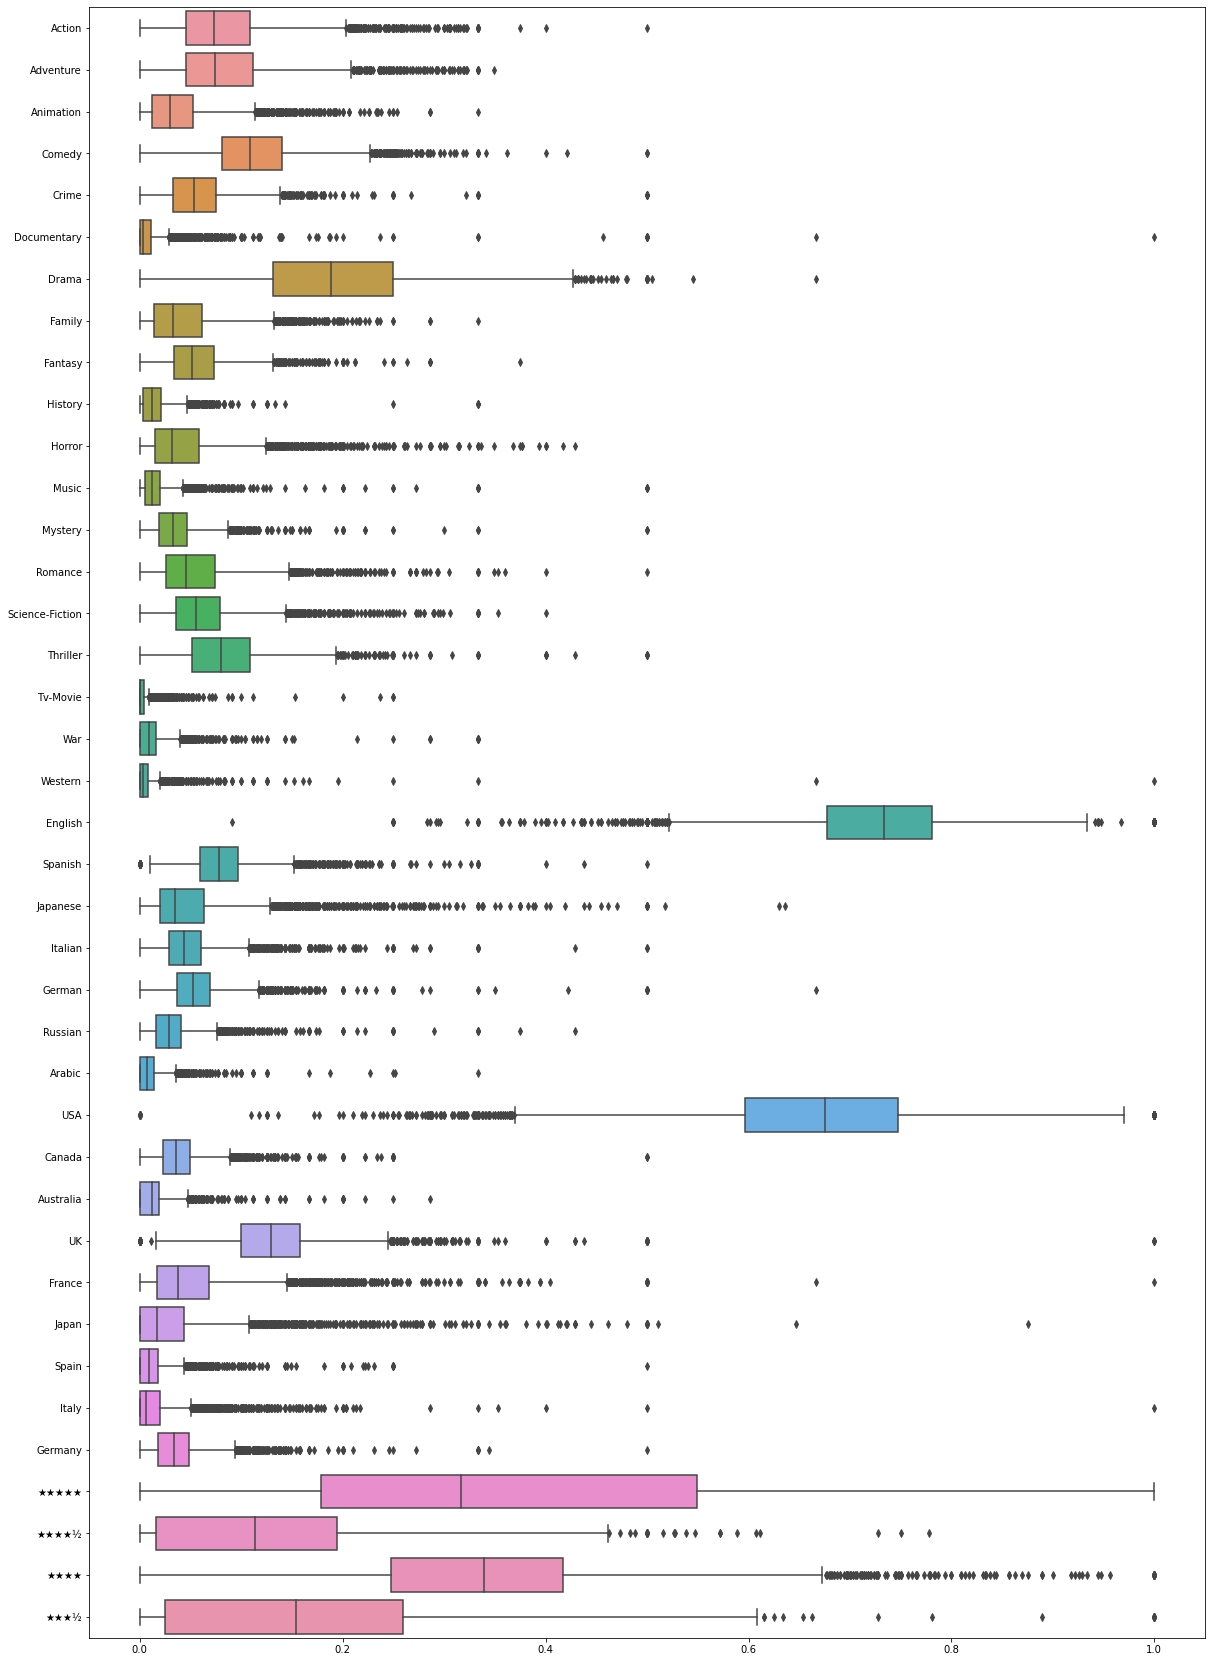

In [217]:
plot_outliers(df_norm)

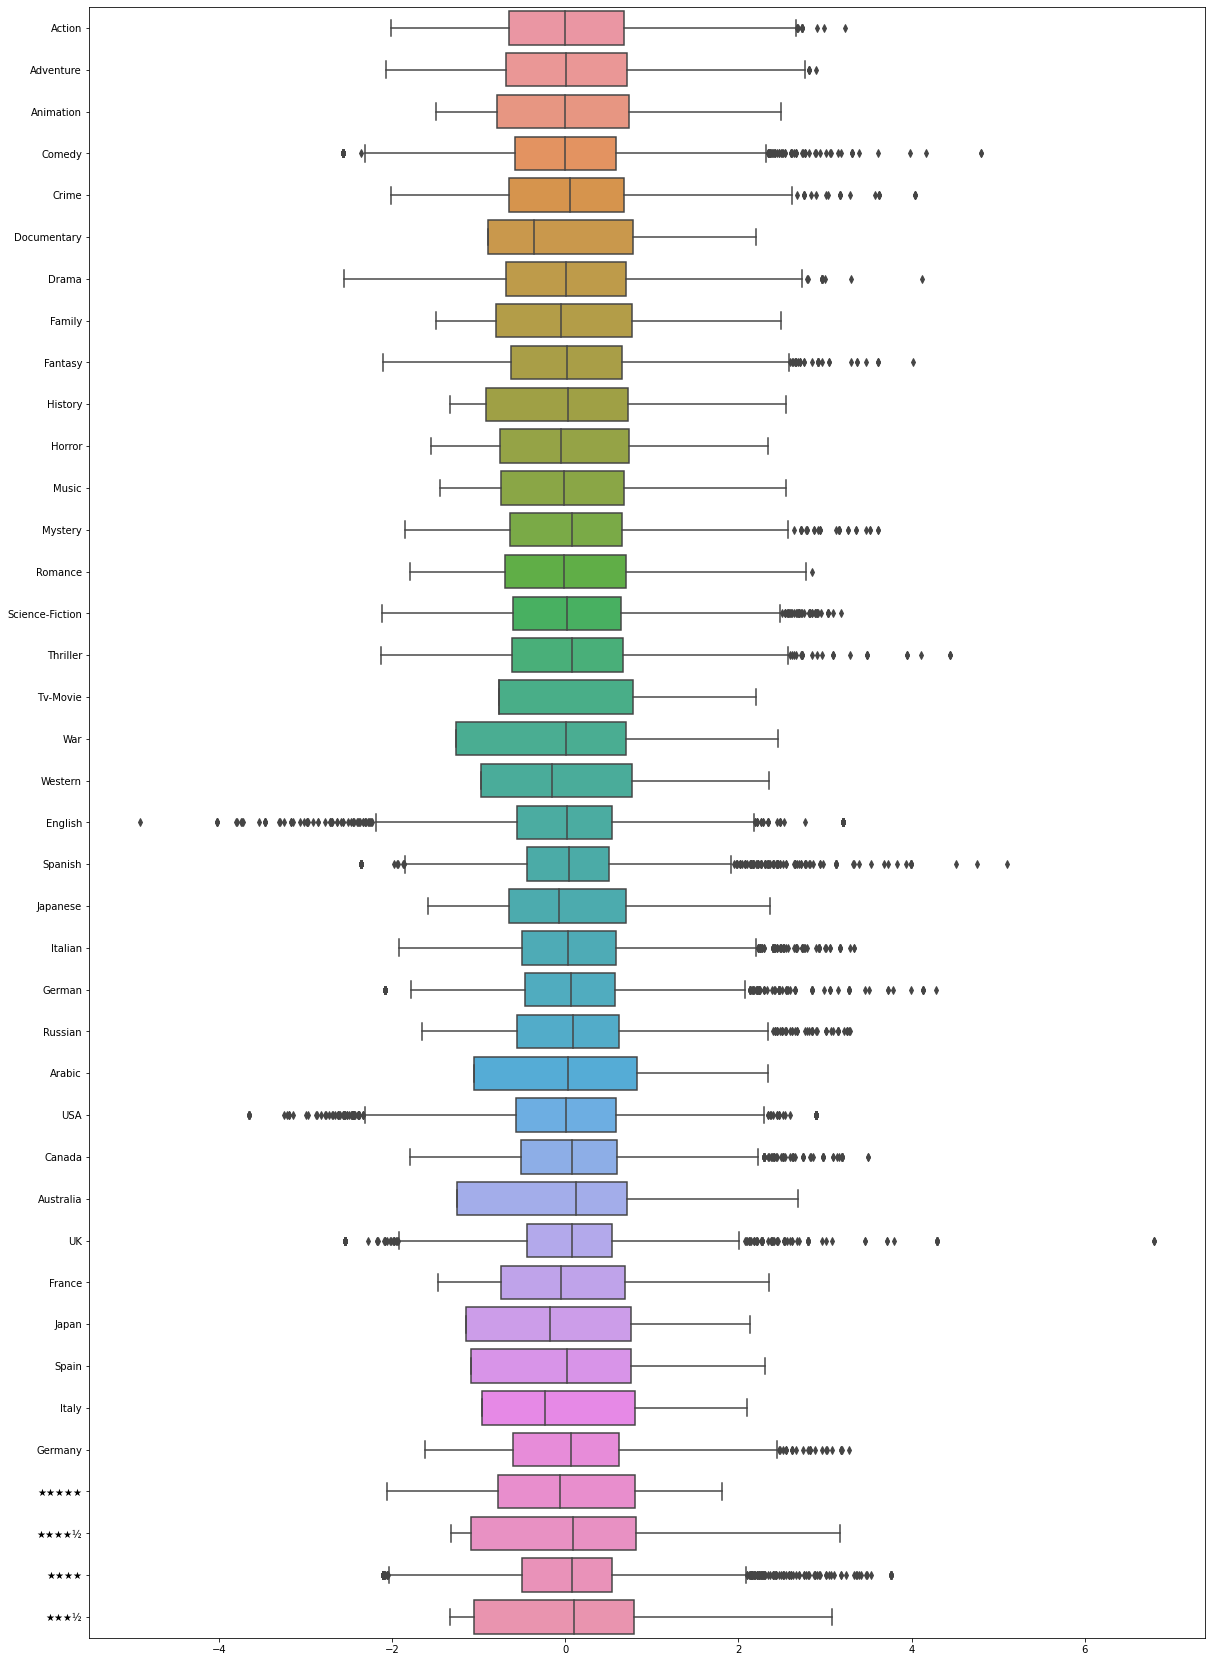

In [218]:
plot_outliers(df_norm_transformed)

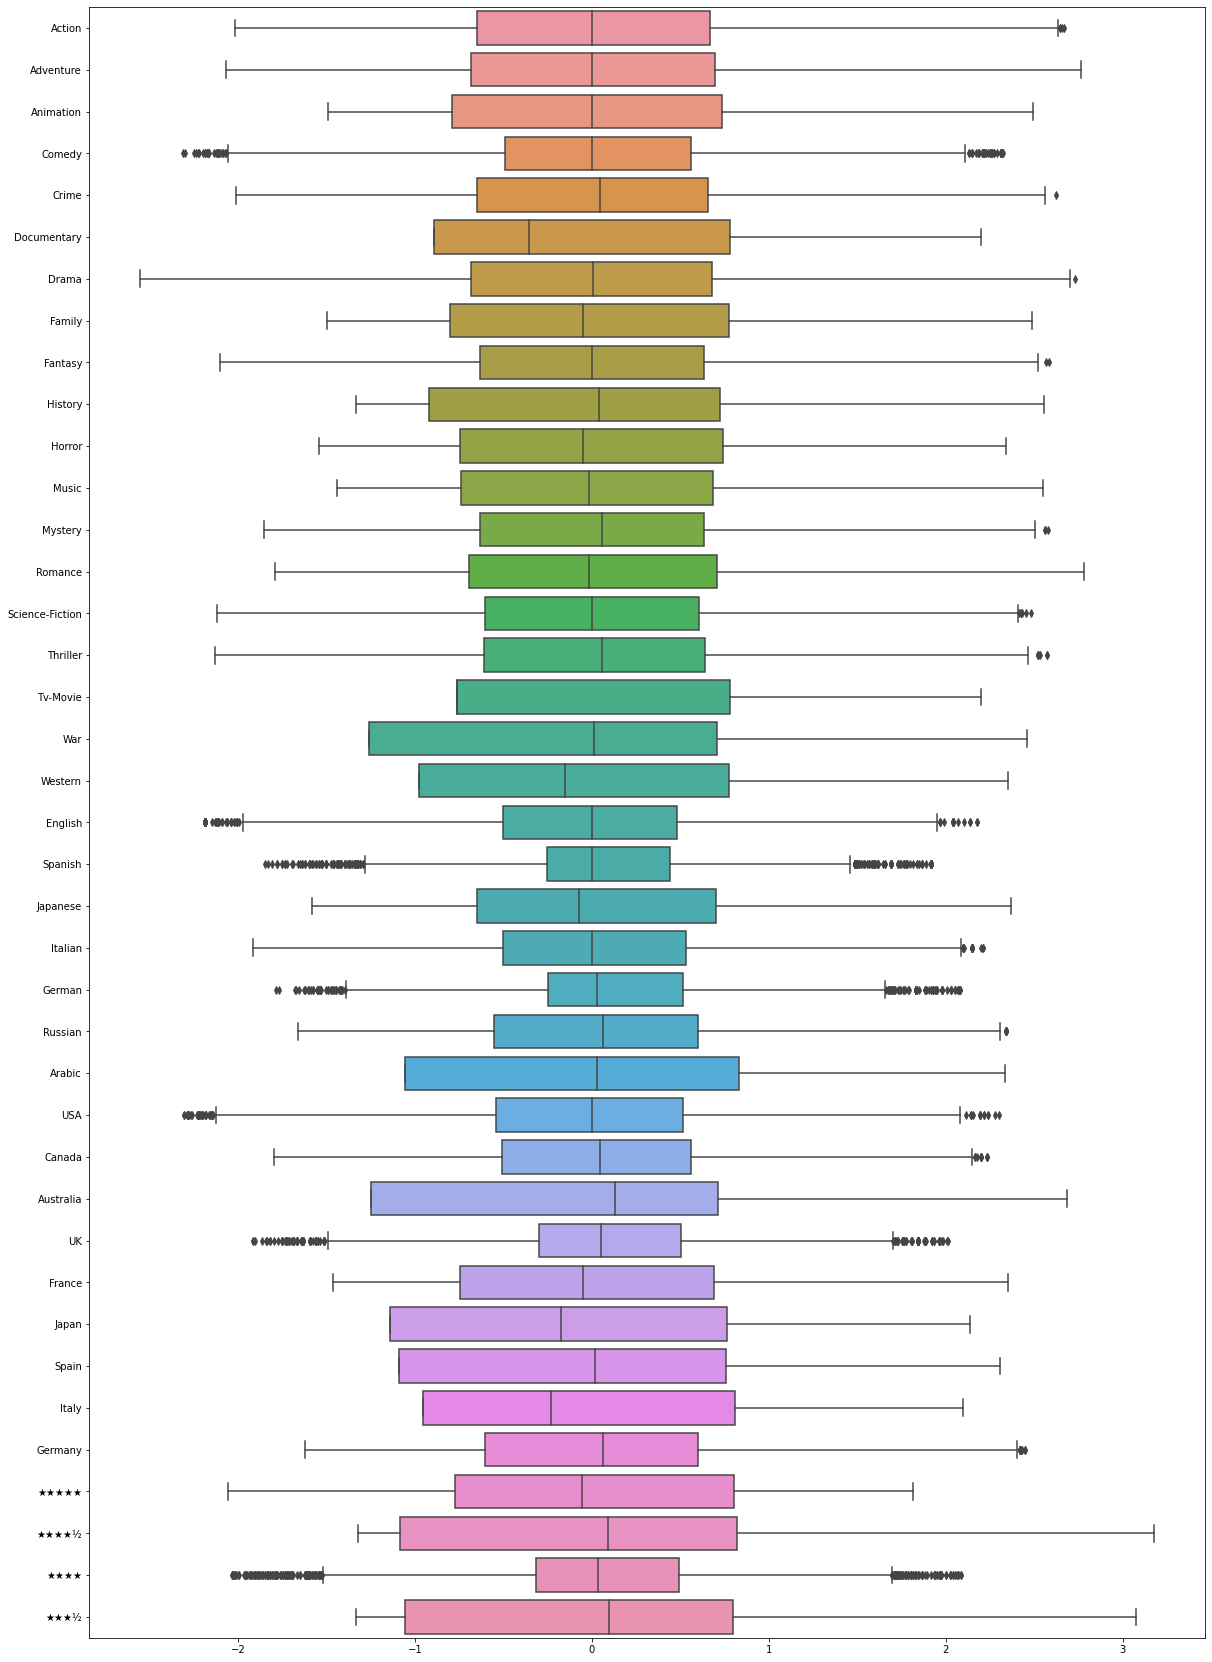

In [222]:
df_n_t_o = outlier_detection_iqr(df_norm_transformed)
plot_outliers(df_n_t_o)

In [162]:
df_n_t_o.dropna(inplace=True)
df_n_t_o.isna().sum()

(3379, 39)

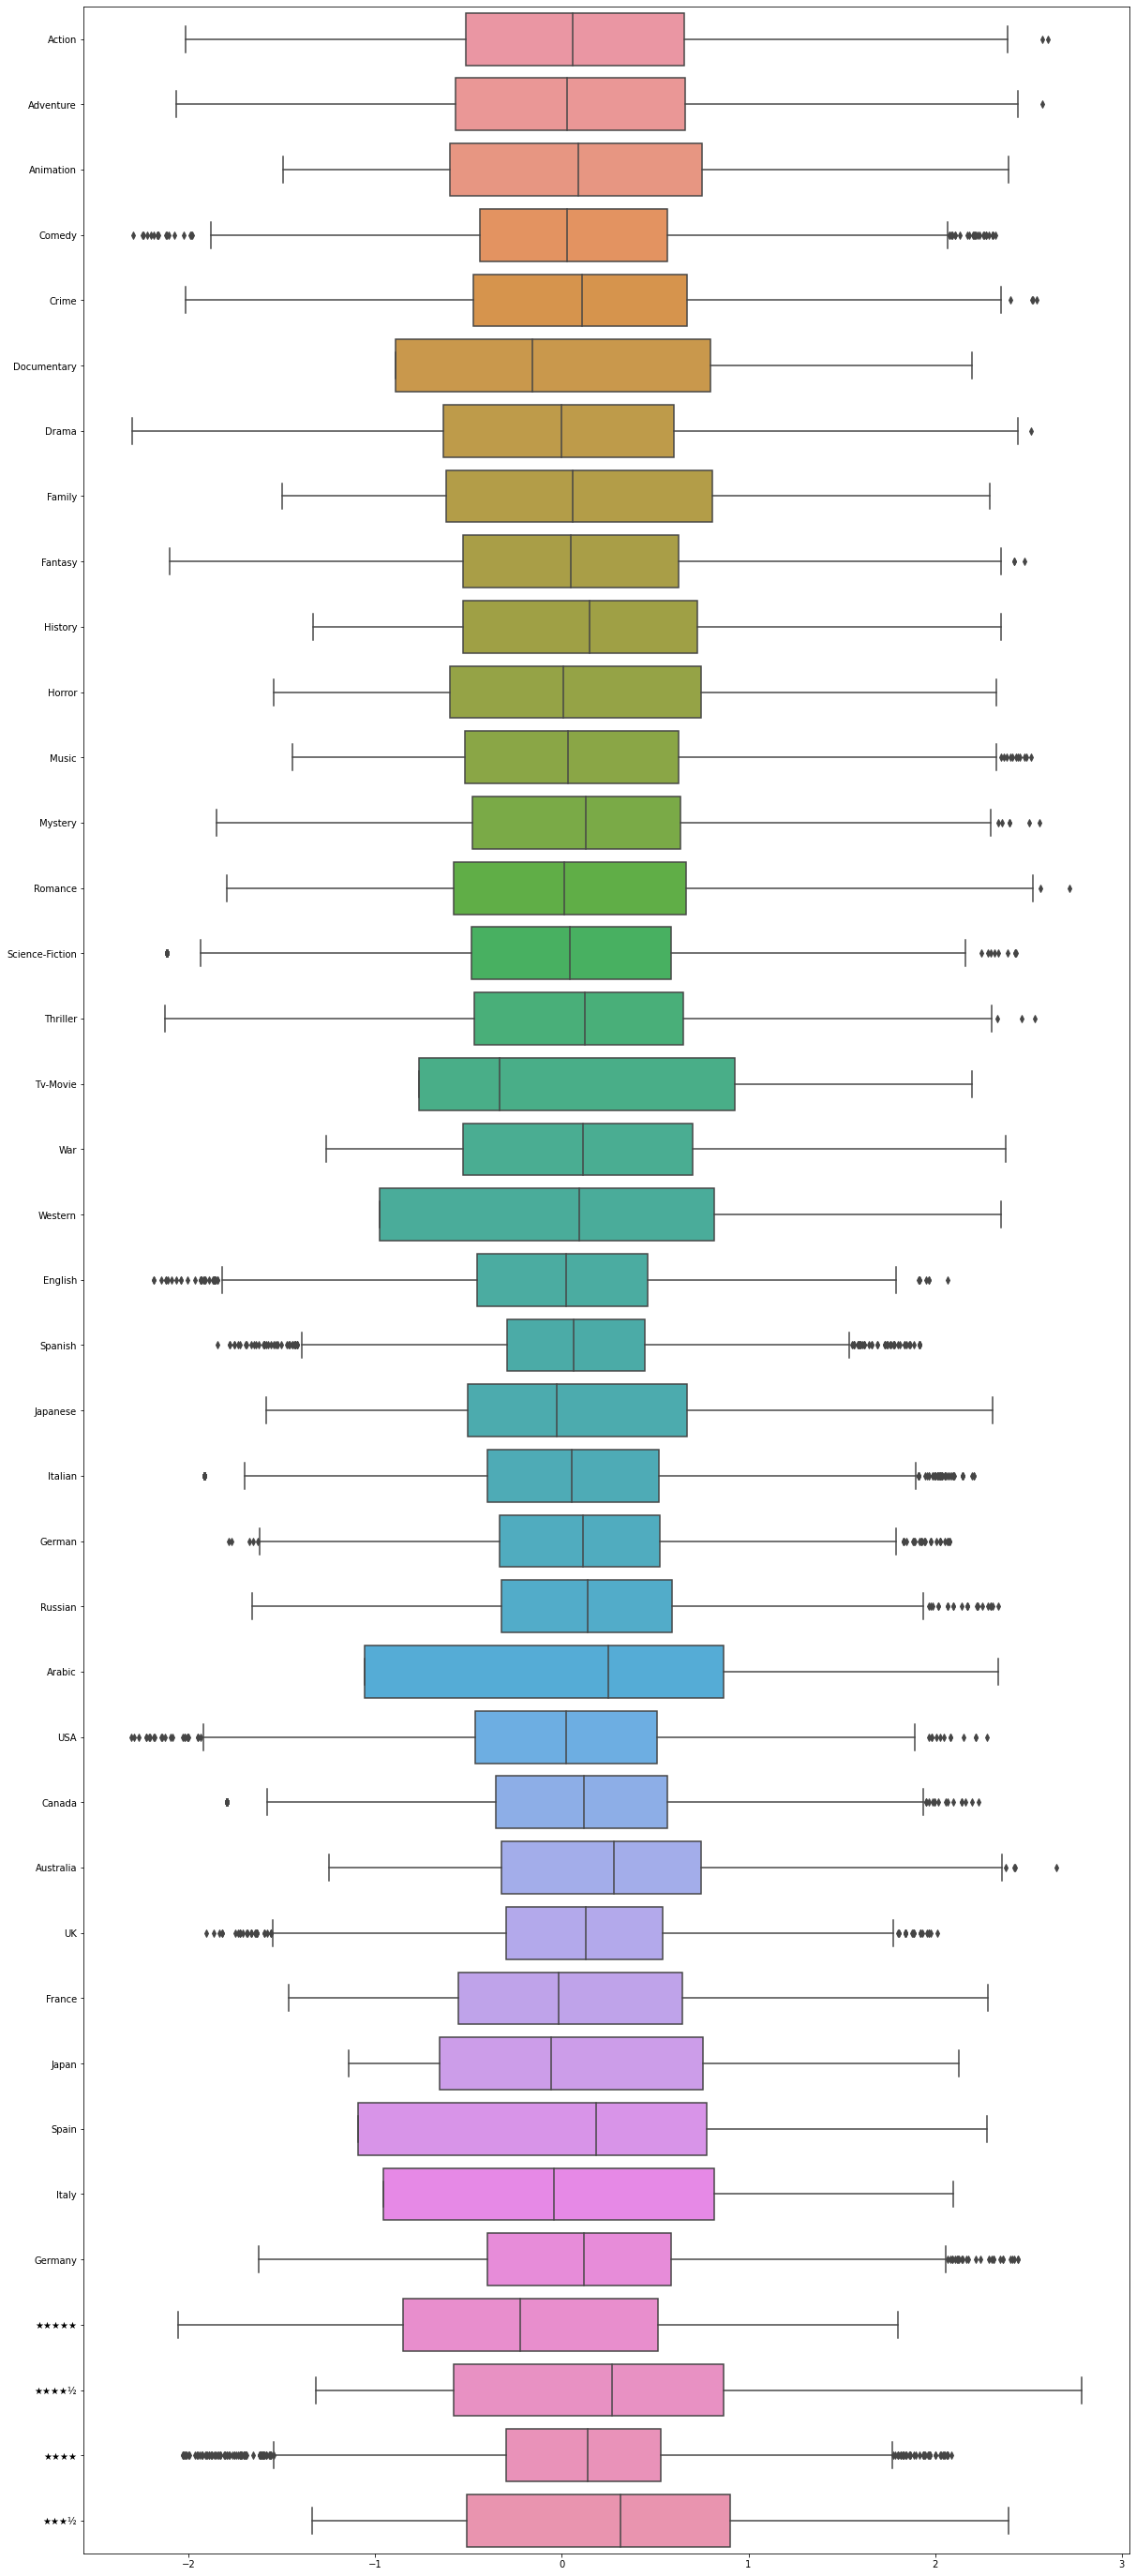

In [164]:
df_n_t_o.shape

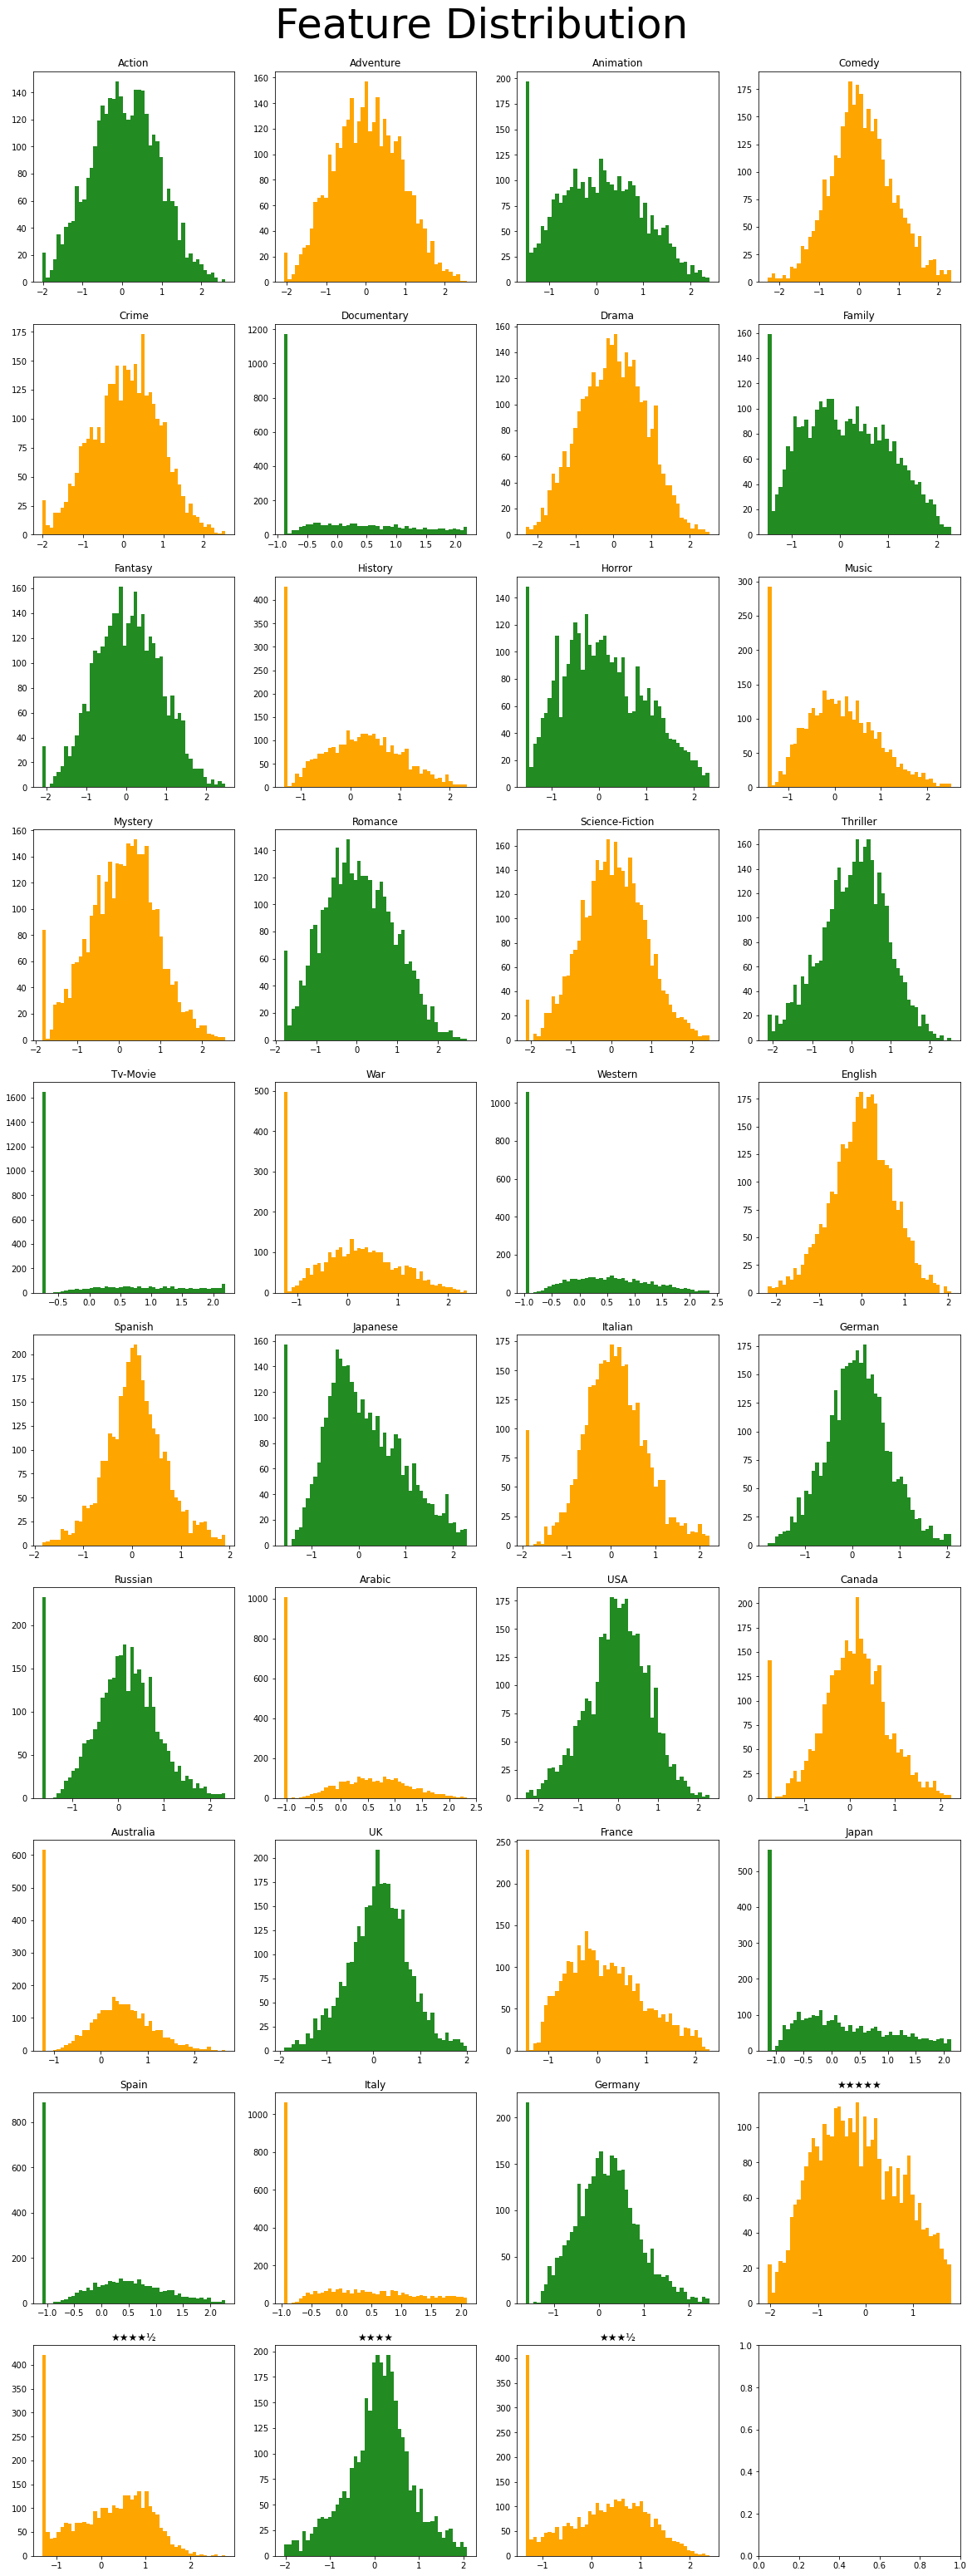

In [165]:
plot_outliers(df_n_t_o)

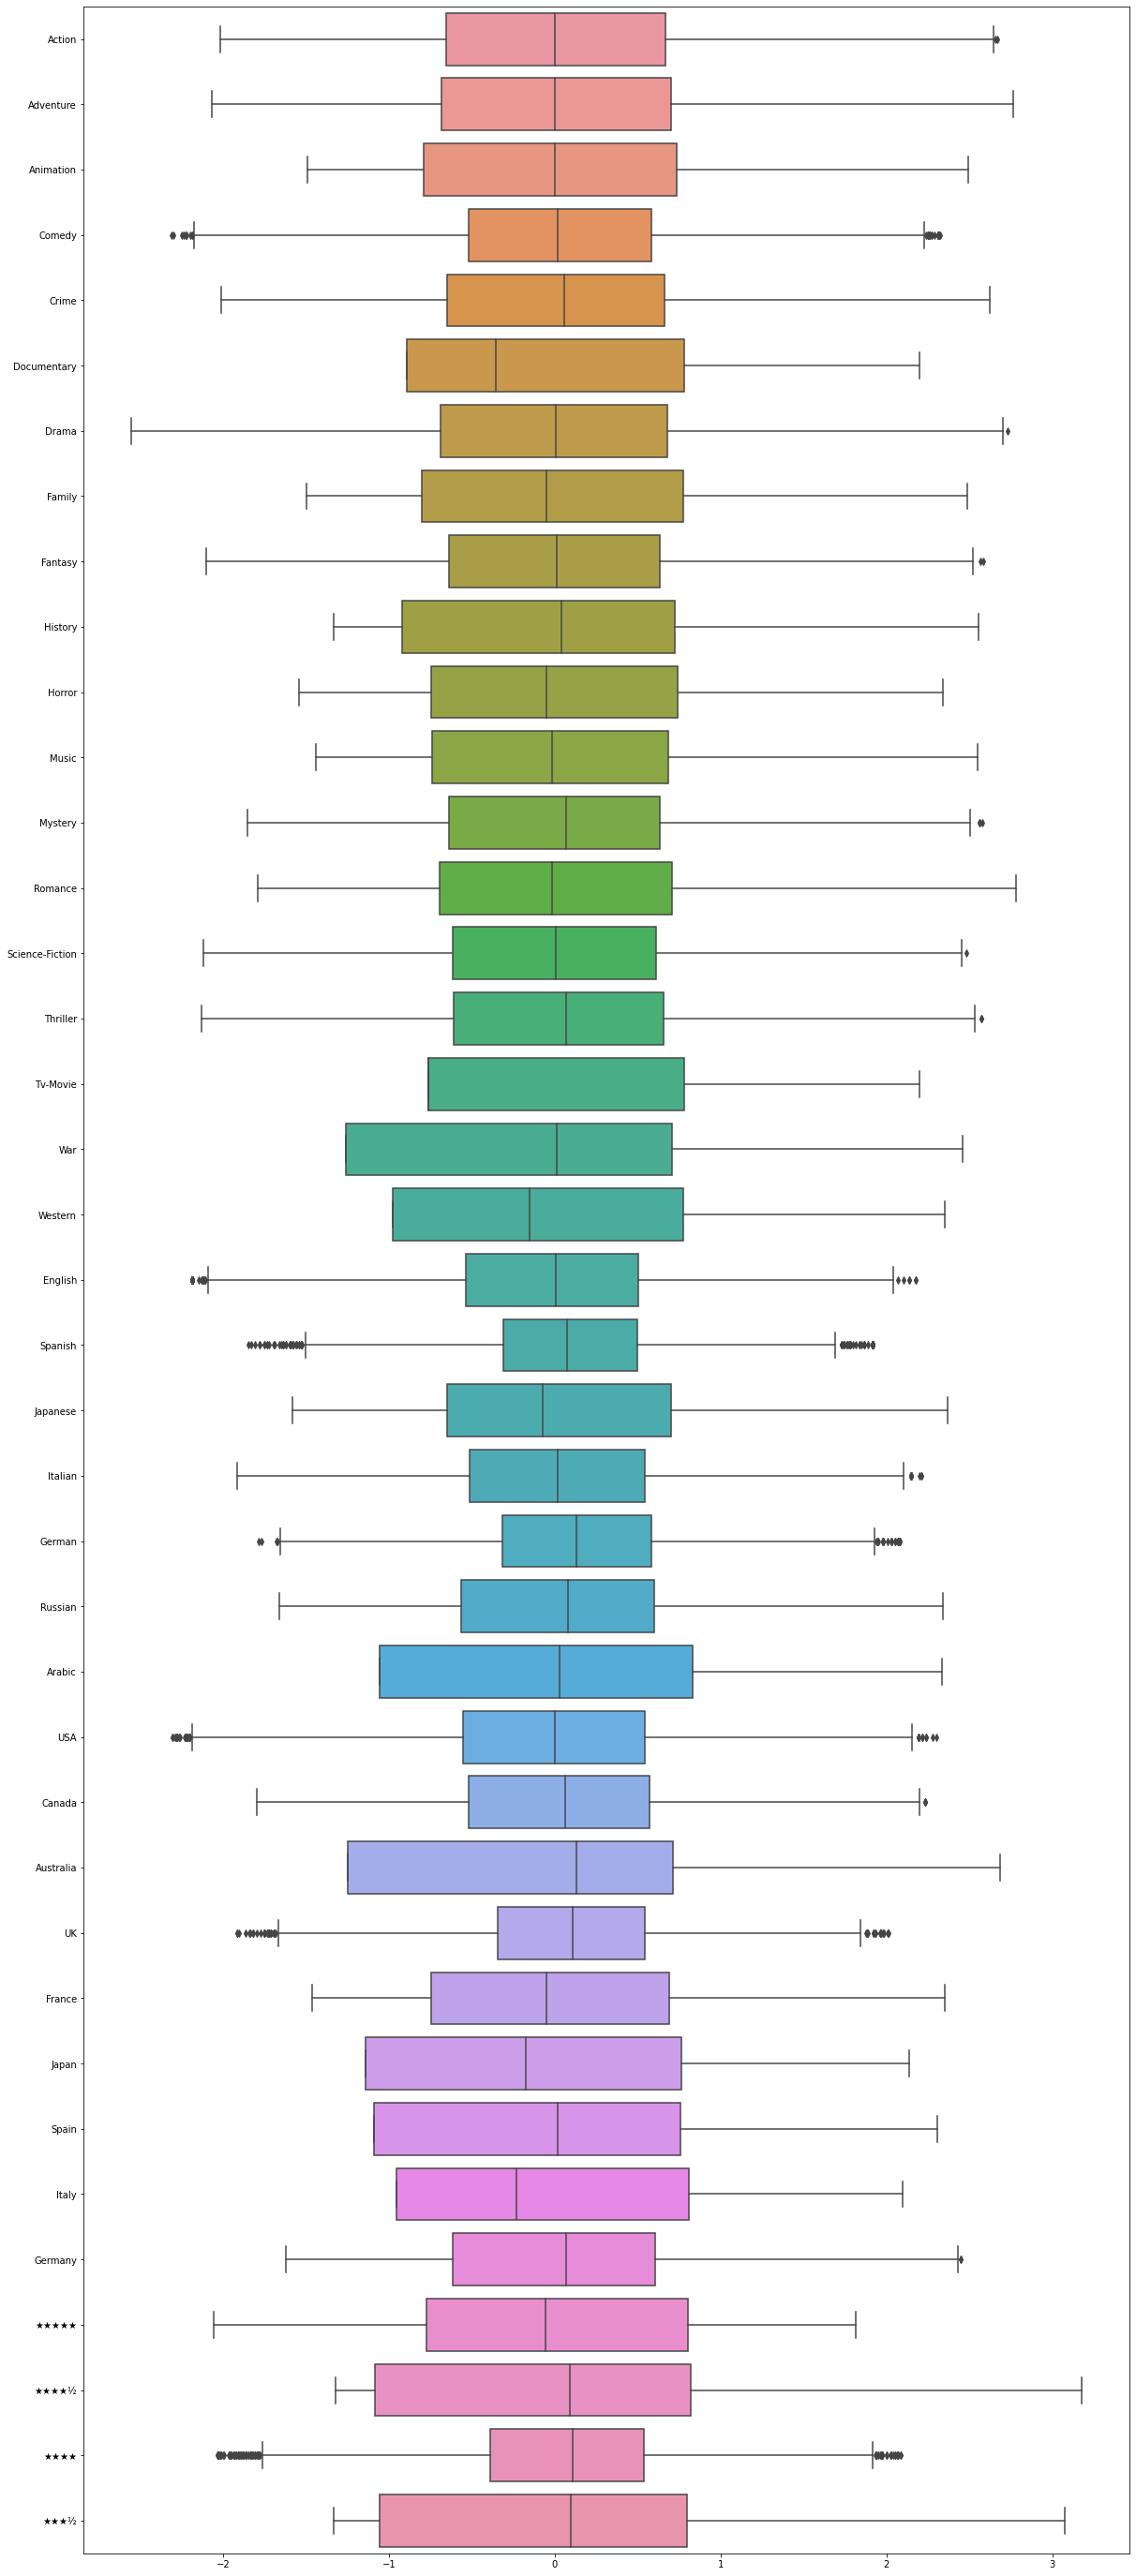

In [157]:
plot_feature_distribution(df_n_t_o)

In [ ]:
pca  = PCA(n_components=20)

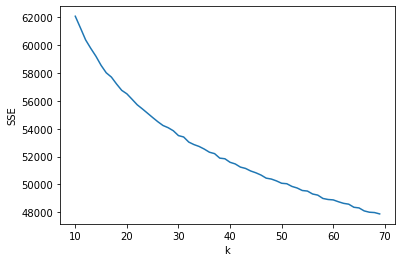

In [172]:
from matplotlib import cm
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
df_n_t_o

For n_clusters = 10 The silhouette_score is : 0.04240716231448754


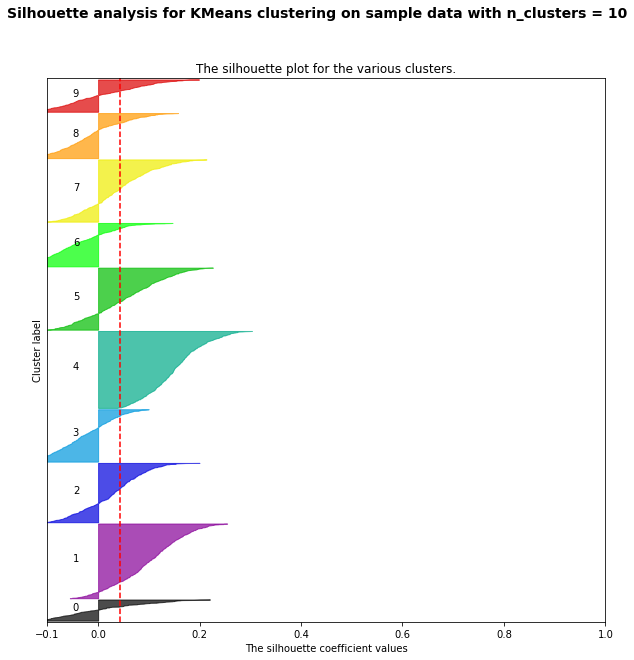

For n_clusters = 11 The silhouette_score is : 0.04128754280433627


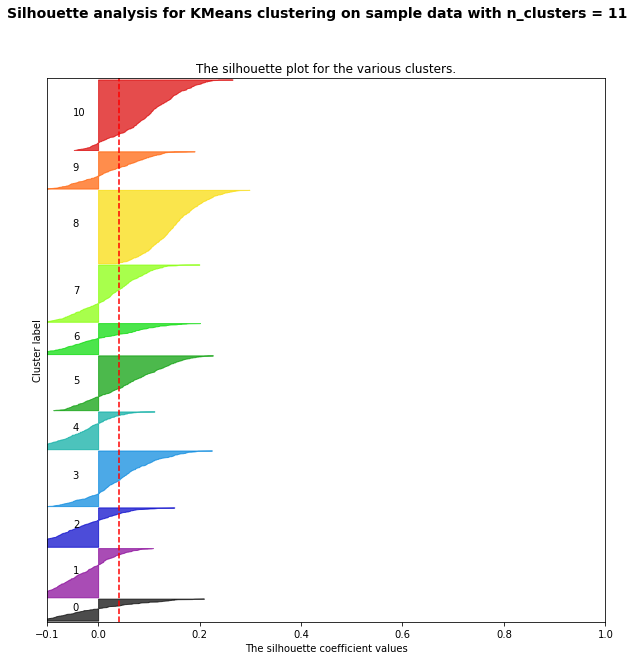

For n_clusters = 12 The silhouette_score is : 0.041418816772878446


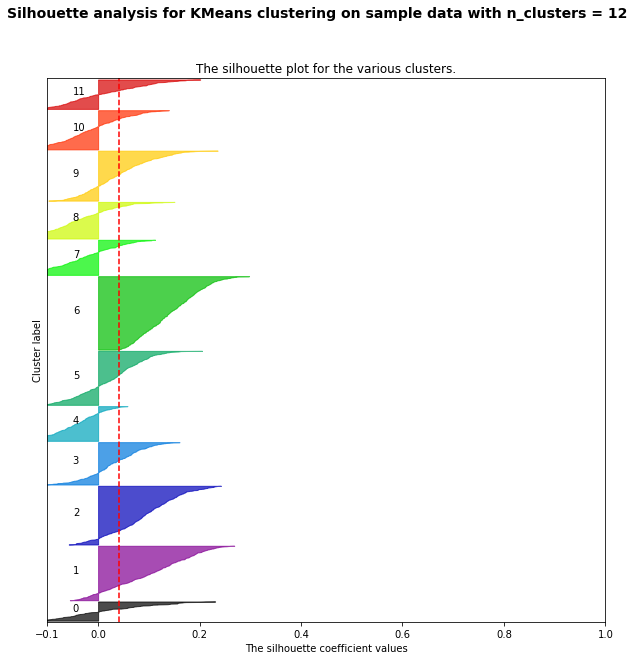

For n_clusters = 13 The silhouette_score is : 0.03688724612273275


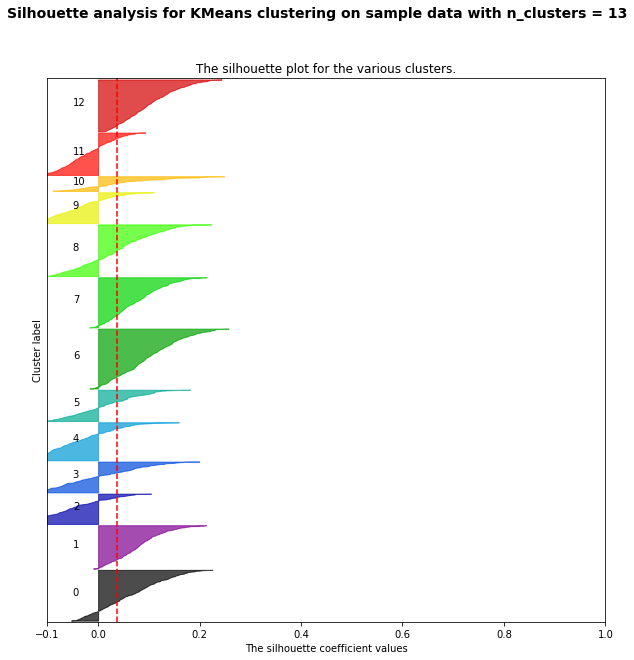

For n_clusters = 14 The silhouette_score is : 0.03331297586434062


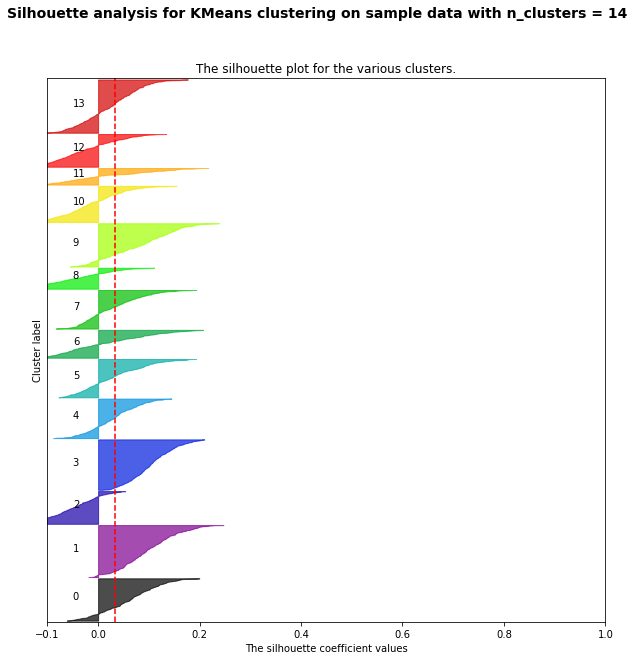

For n_clusters = 15 The silhouette_score is : 0.03589241082279488


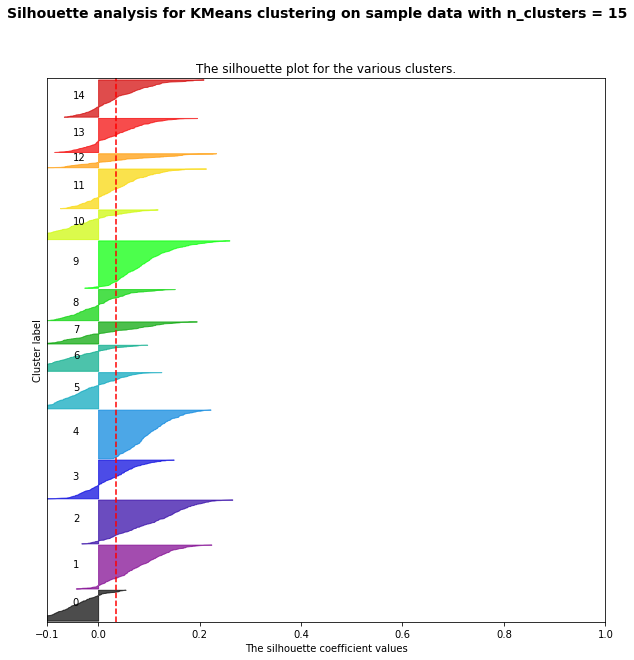

For n_clusters = 16 The silhouette_score is : 0.03346701851998482


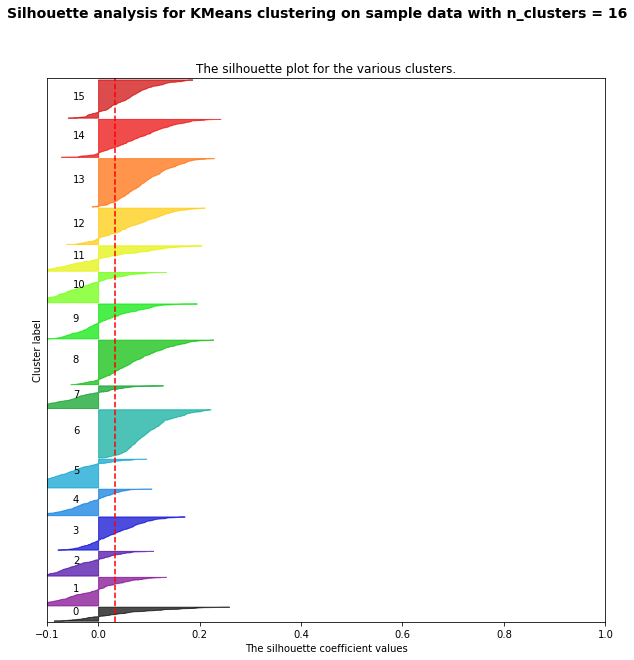

For n_clusters = 17 The silhouette_score is : 0.030597970114276004


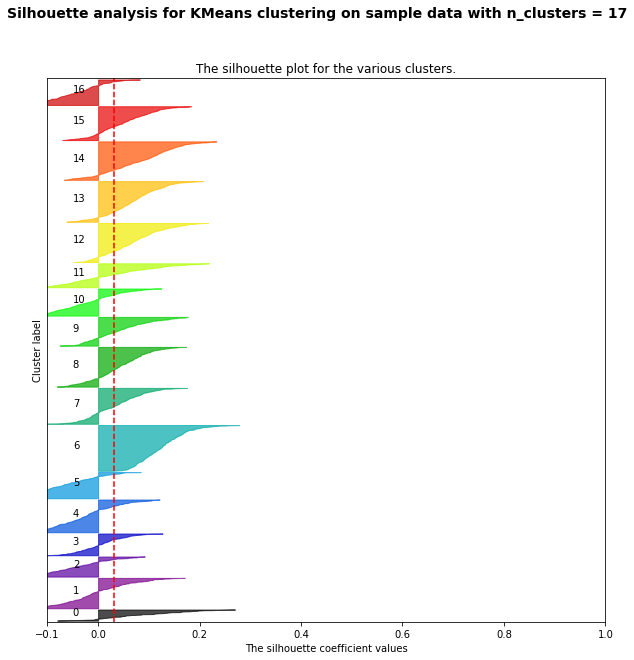

For n_clusters = 18 The silhouette_score is : 0.029661747349340583


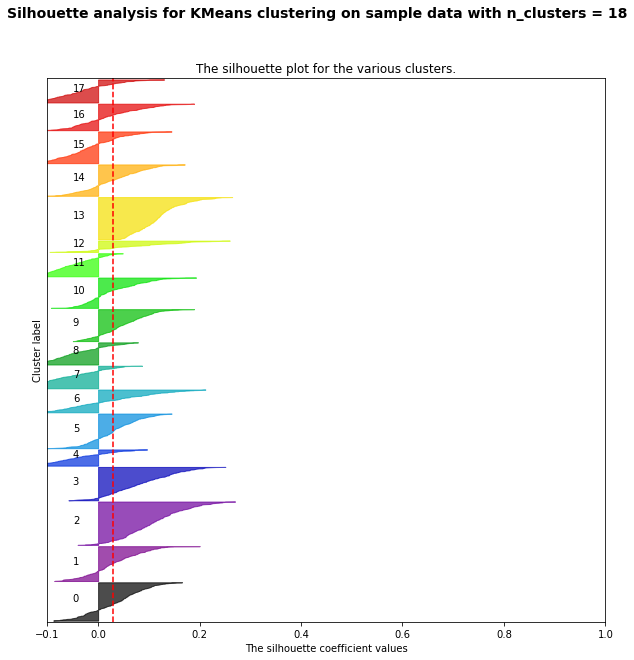

For n_clusters = 19 The silhouette_score is : 0.030857780871115504


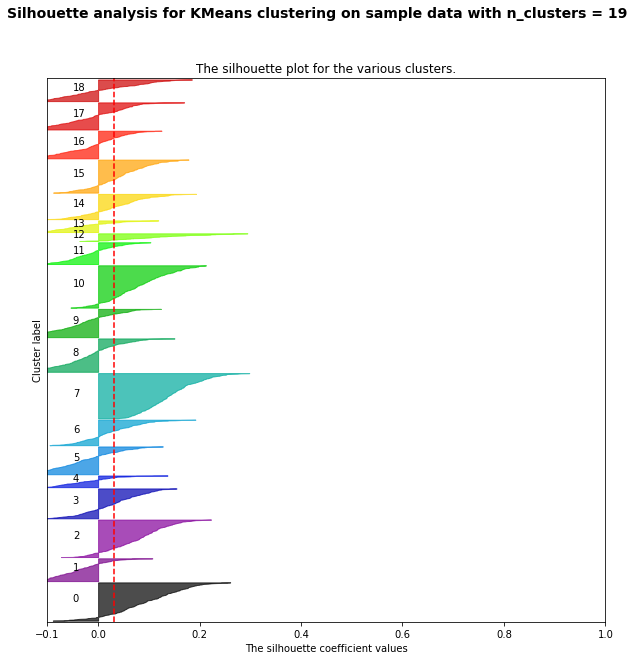

For n_clusters = 20 The silhouette_score is : 0.030784603552781557


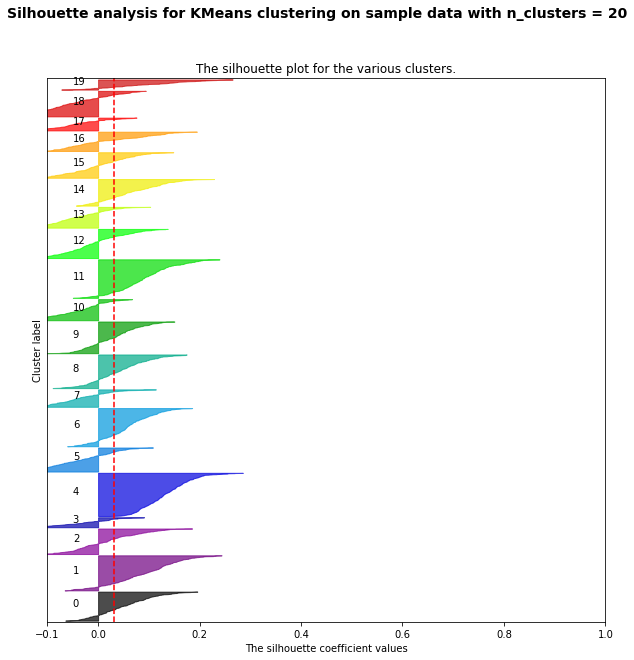

For n_clusters = 21 The silhouette_score is : 0.02777459181278508


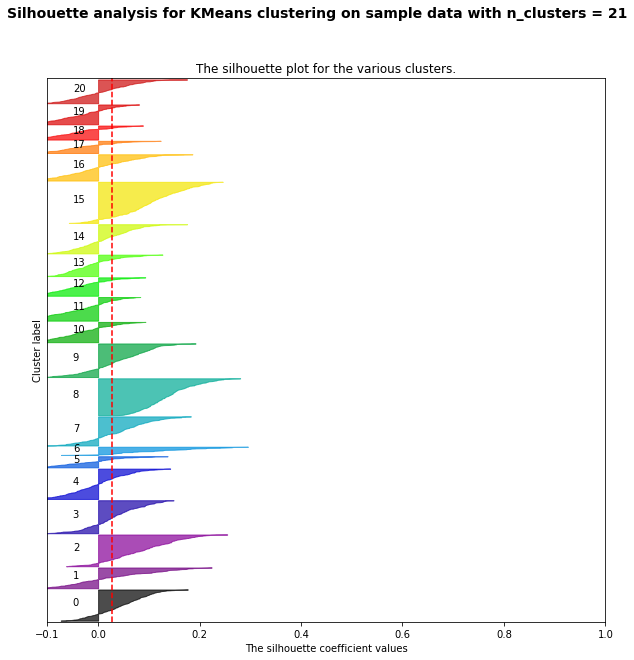

For n_clusters = 22 The silhouette_score is : 0.03218805069389546


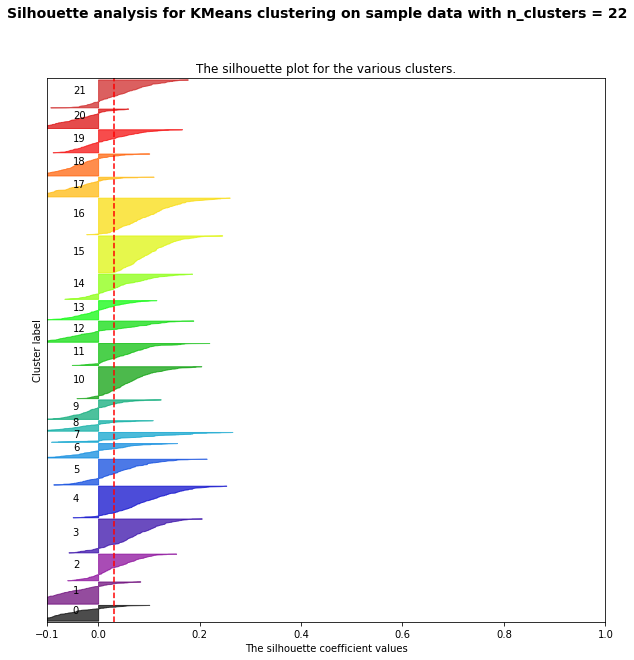

For n_clusters = 23 The silhouette_score is : 0.025668594732111347


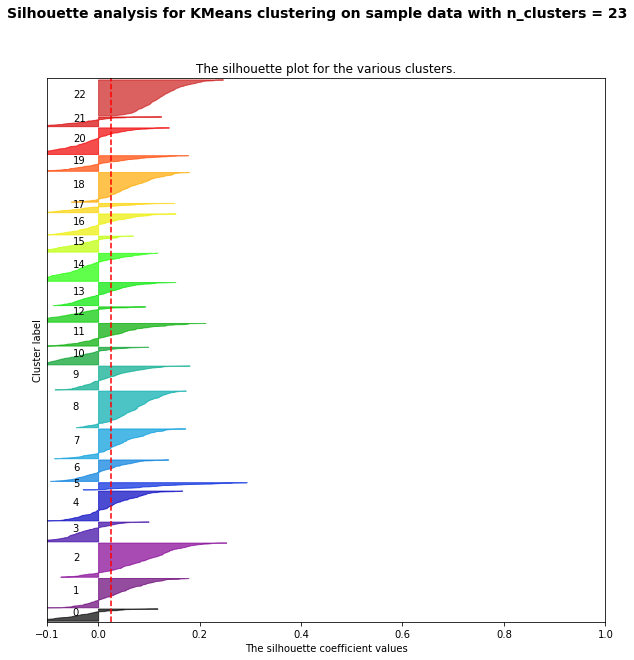

For n_clusters = 24 The silhouette_score is : 0.026120297841821218


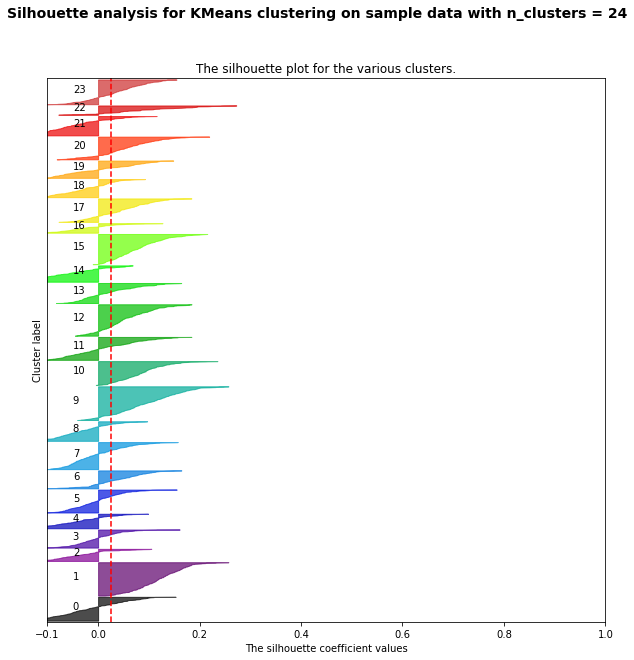

For n_clusters = 25 The silhouette_score is : 0.02941896179106541


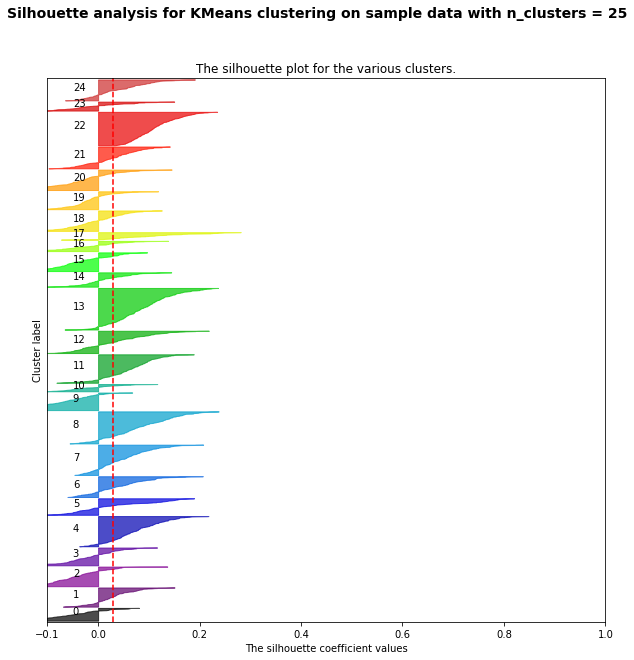

For n_clusters = 26 The silhouette_score is : 0.032859134457971076


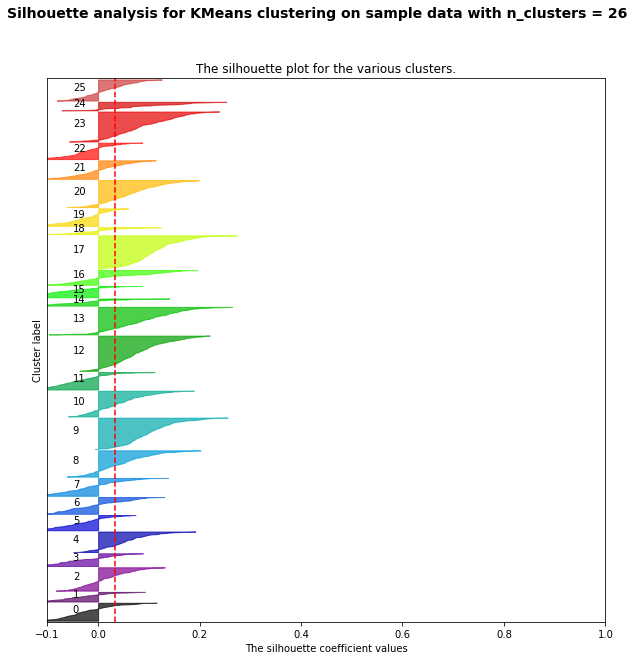

For n_clusters = 27 The silhouette_score is : 0.025562707867621326


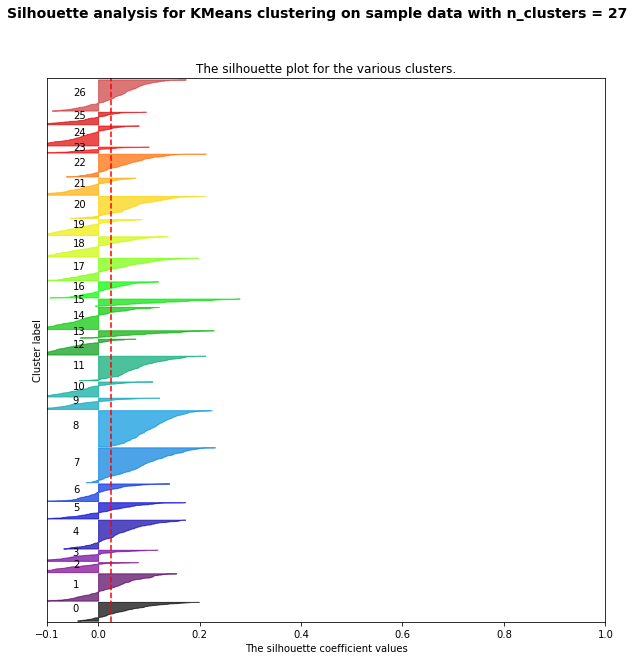

For n_clusters = 28 The silhouette_score is : 0.021279039164482667


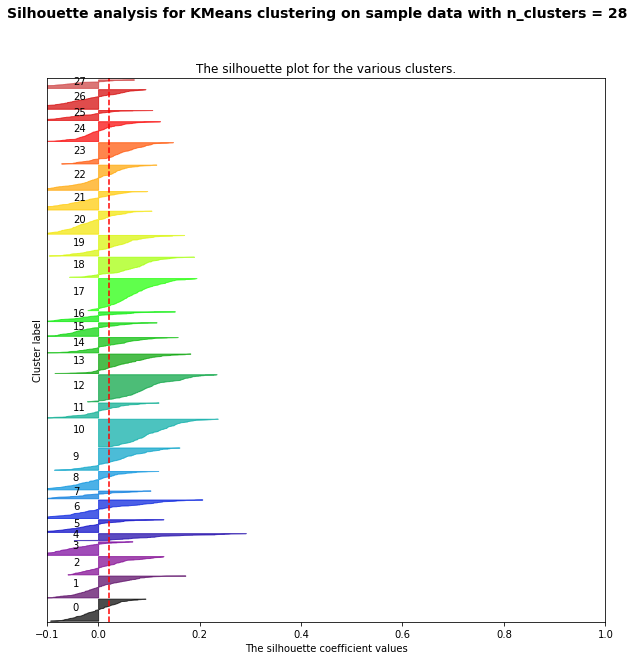

For n_clusters = 29 The silhouette_score is : 0.019265364337507584


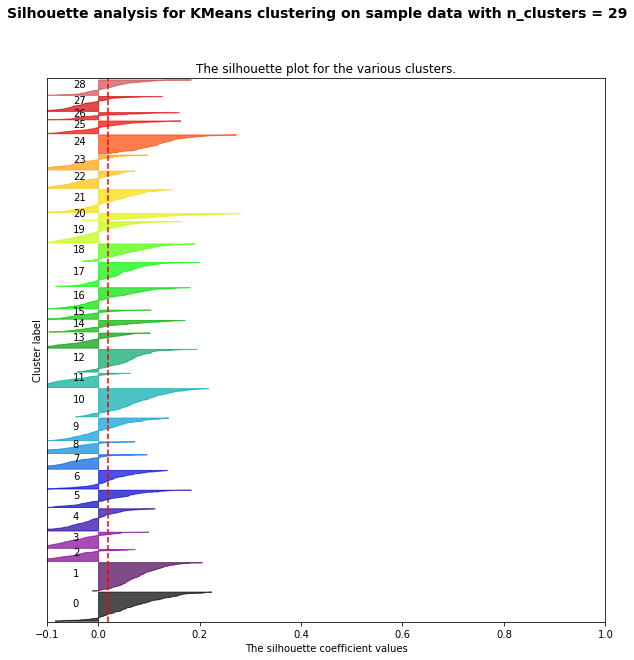

For n_clusters = 30 The silhouette_score is : 0.020604039092332663


For n_clusters = 31 The silhouette_score is : 0.025911913250625654


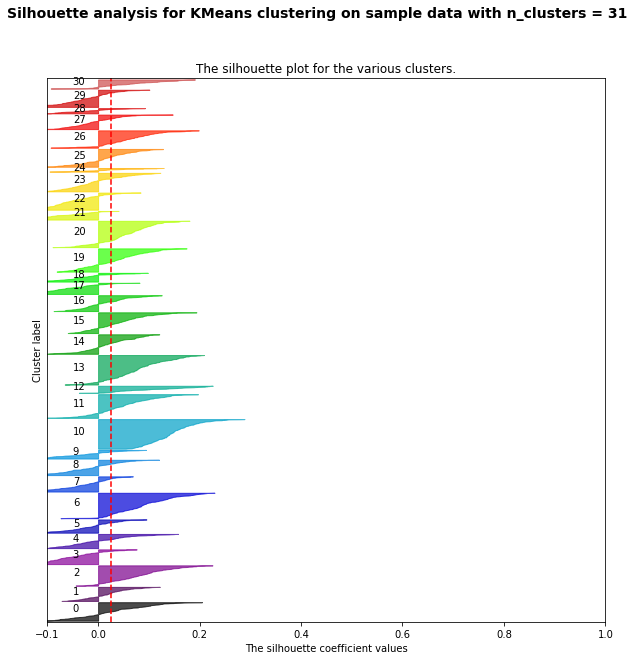

For n_clusters = 32 The silhouette_score is : 0.020594891696271617


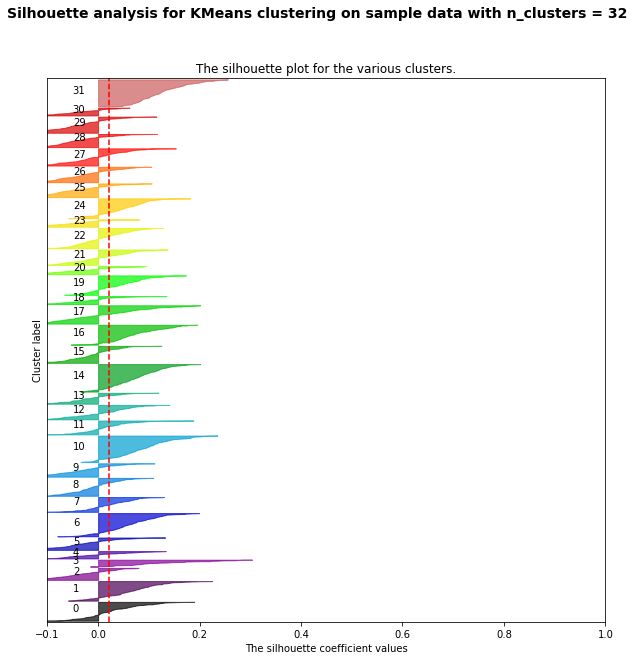

For n_clusters = 33 The silhouette_score is : 0.01704310780123342


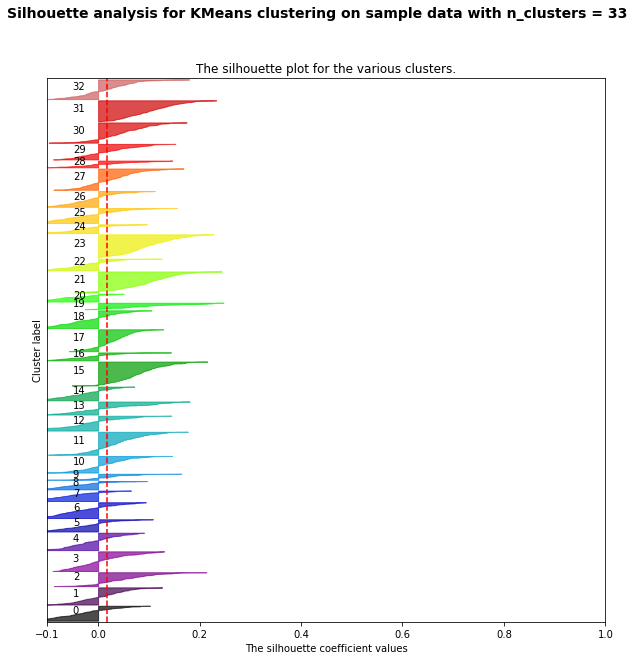

For n_clusters = 34 The silhouette_score is : 0.0227121431105388


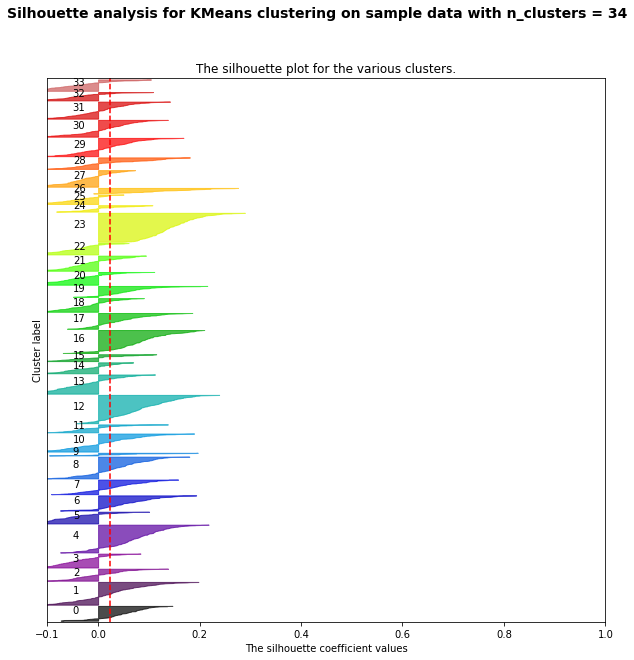

For n_clusters = 35 The silhouette_score is : 0.01972358436531988


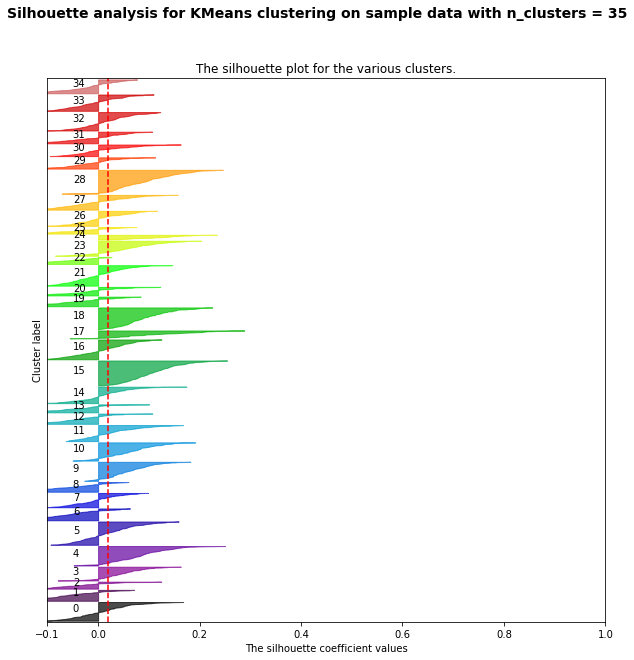

For n_clusters = 36 The silhouette_score is : 0.018728433069471657


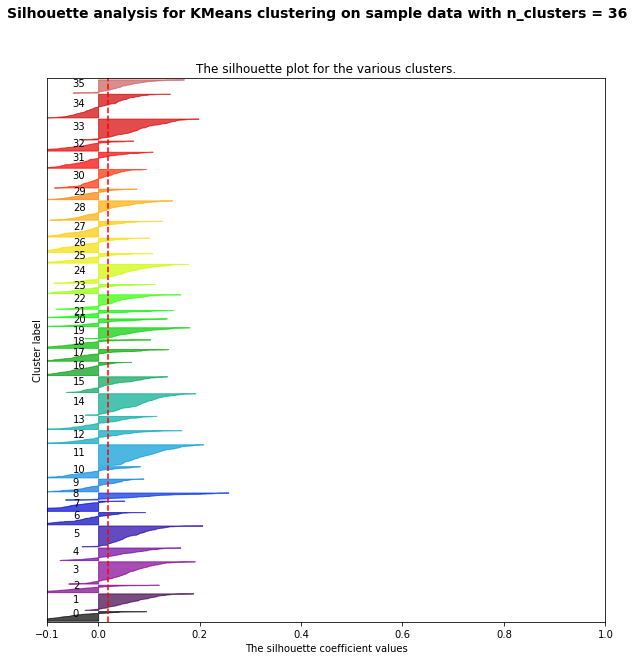

For n_clusters = 37 The silhouette_score is : 0.018685196035582368


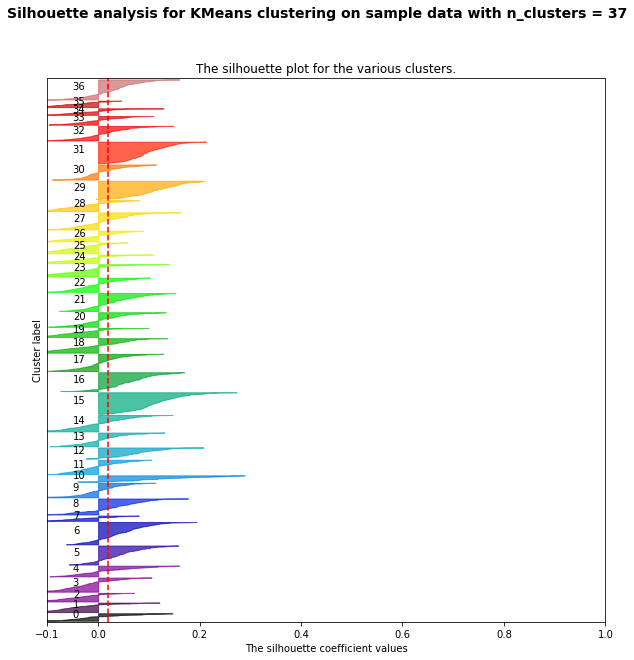

For n_clusters = 38 The silhouette_score is : 0.02030568457668097


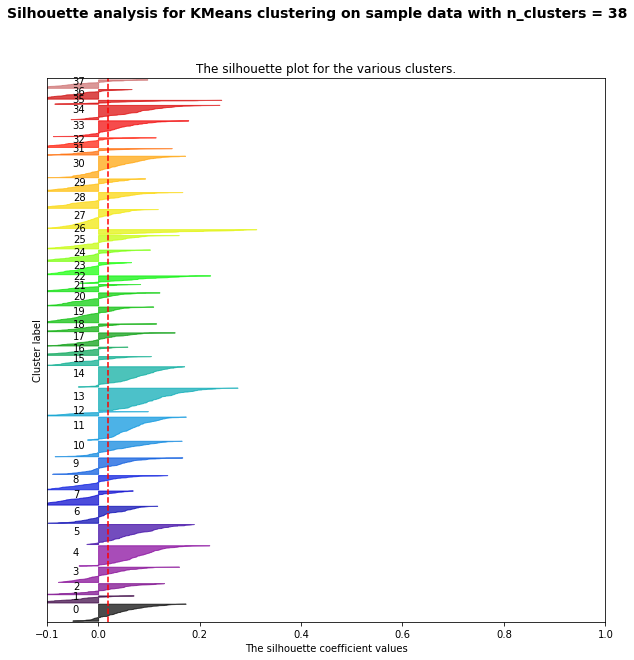

For n_clusters = 39 The silhouette_score is : 0.02241272048921838


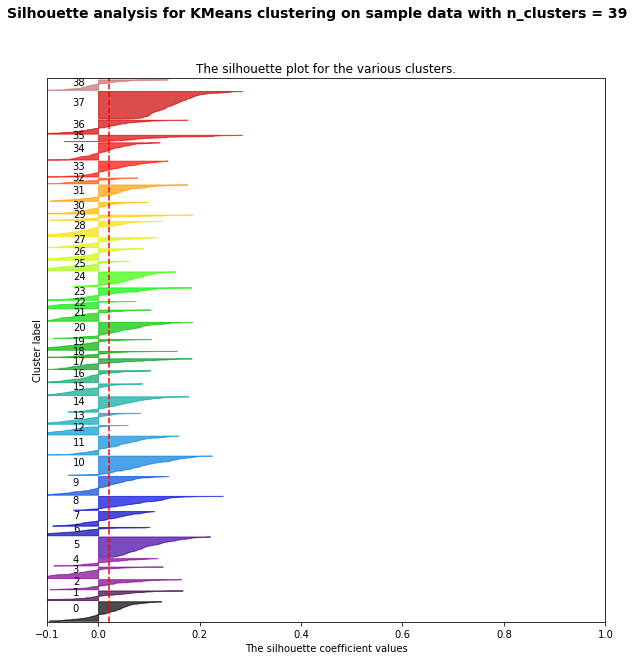

For n_clusters = 40 The silhouette_score is : 0.022245909913942503


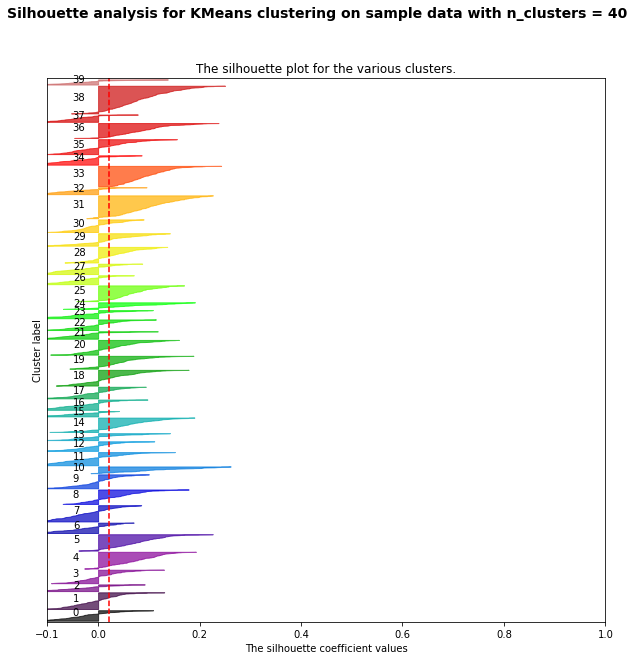

For n_clusters = 41 The silhouette_score is : 0.0181531632411171


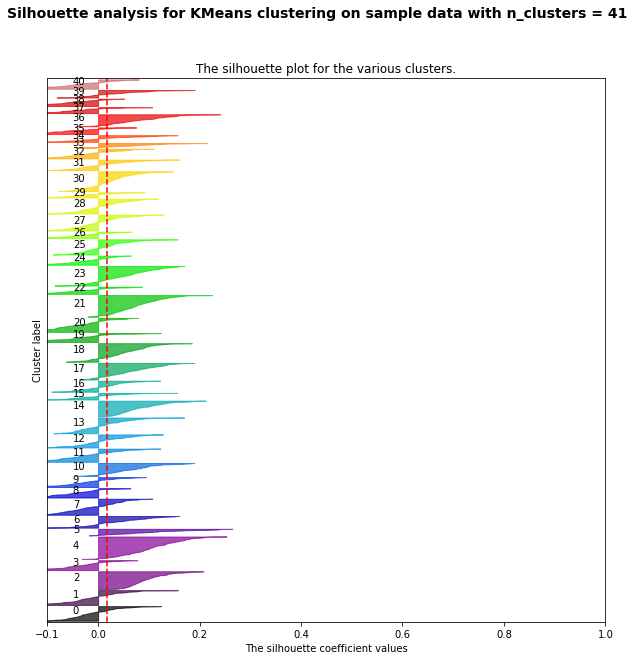

For n_clusters = 42 The silhouette_score is : 0.019229130605049816


For n_clusters = 43 The silhouette_score is : 0.01988637931538705


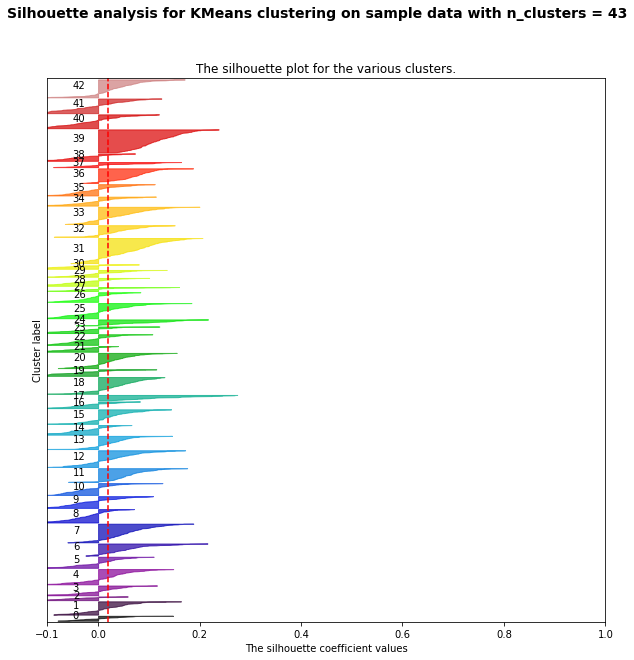

For n_clusters = 44 The silhouette_score is : 0.019142857048429864


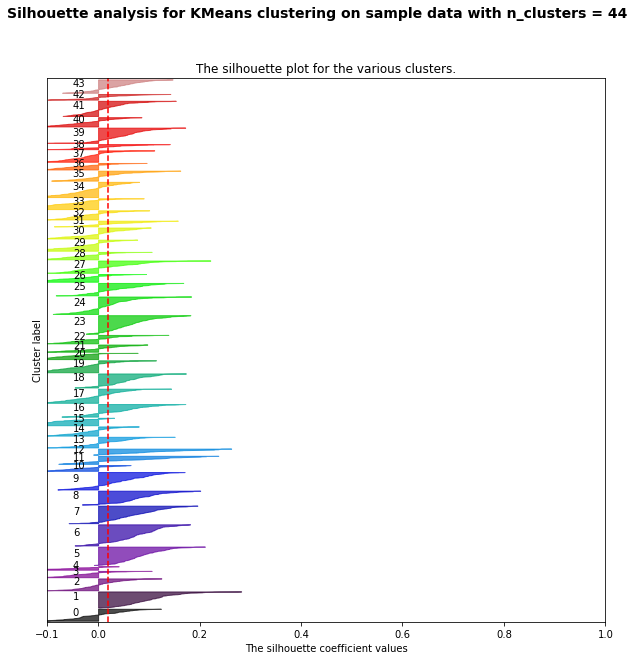

For n_clusters = 45 The silhouette_score is : 0.020421233339822632


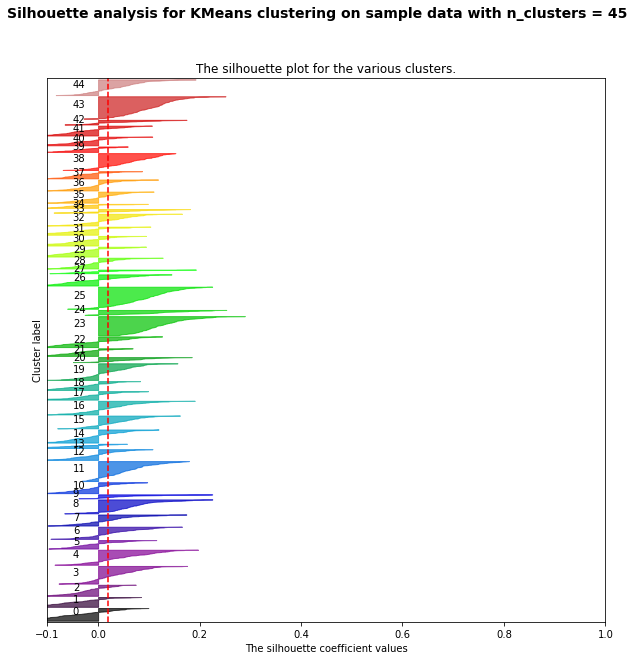

For n_clusters = 46 The silhouette_score is : 0.01741724050165995


For n_clusters = 47 The silhouette_score is : 0.0183823403766746


For n_clusters = 48 The silhouette_score is : 0.018136506112338645


For n_clusters = 49 The silhouette_score is : 0.020421305696962138


In [236]:
range_n_clusters = [a for a in range(10,50)]
scores=[]
models = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(10, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_n_t_o) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',random_state=10)
    models.append(clusterer)
    cluster_labels = clusterer.fit_predict(df_n_t_o)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_n_t_o, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_n_t_o, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed



    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [234]:
it can be seen that the kmeans algorithm doesn't convergence

SyntaxError: invalid syntax (321695910.py, line 1)

In [237]:
elbow_scores = []

for i,model in enumerate(models):
    model.fit_predict(df_n_t_o)
    elbow_scores.append(model.inertia_)

plt.plot(range_n_clusters, elbow_scores)
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()